# AutoML

Name: Jhalak Surve

# Abstract

In this notebook, we explore the predictive modeling of flight delays using two distinct approaches: H2O.ai and Statsmodels. Our analysis begins with data exploration, preprocessing, and splitting into training, validation, and test sets. In the H2O.ai framework, we employ AutoML with hyperparameter tuning and evaluation metrics to assess model performance, ultimately selecting a Gradient Boosting Machine model with specific hyperparameters. Simultaneously, the Statsmodels approach involves linear regression analysis to understand the significance of predictor variables, revealing the importance of airline, flight, and time-related factors. Our findings provide a comparative analysis of these modeling techniques, highlighting the selected H2O.ai model's predictive accuracy and insights from the Statsmodels linear regression, shedding light on their respective strengths and weaknesses in predicting flight delays. These results have implications for airline operations and passenger satisfaction, enabling data-driven decision-making in the aviation industry.

# About the Dataset

**Target Variable:**

**Delay**: Will the flight get delayed or not


**Predictor Variables:**

**Airline**: Which Airline the flight is from

**Flight**: Defines the flight number

**AirportFrom**: Source Airport

**AirportTo**: Destination Airport

**DayOfWeek**: Which day of the week it is

**Time**: Time of Departure

**Length**: Duration of the flight

In [5]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [6]:
!pip cache purge

Files removed: 5


# Installations

In [7]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=aafae559eb7d06457067f76bda0f4641e300b164dfaf370025ee6b7bc3d5413e
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [8]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [9]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpegh3kofd
  JVM stdout: /tmp/tmpegh3kofd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpegh3kofd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_dur5ik
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


When we call h2o.init(), it means that we are essentially starting up the H2O software on our computer.

In [10]:
# Loading the dataset from the github repository

url = 'https://raw.githubusercontent.com/jhalak1509/Datasets/main/Airline_Delay_Dataset.csv'

df = pd.read_csv(url)

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [11]:
# Dropping the id column

df = df.drop(['id'], axis = 1)
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


Now, it is confirmed that we have 8 columns. Delay is our target variable.

# Exploratory Data Analysis



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


It can be seen that we have two data types in our dataset:

int64: These columns contain whole numbers (integers).

object: These columns contain text or mixed data types.


In [13]:
df.isnull().sum()  # Checking for any null values in the dataset

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

As seen above, we don't have any null values

In [14]:
df.shape

(539383, 8)

We have 539383 rows and 8 columns in our dataset

In [15]:
# Encoding the categorical variables

def label_encoding(categories):
    #To perform mapping of categorical features
    categories = list(set(list(categories.values)))
    mapping = {}
    for idx in range(len(categories)):
        mapping[categories[idx]] = idx
    return mapping

df['Airline'] = df['Airline'].map(label_encoding(df['Airline']))
df['AirportFrom'] = df['AirportFrom'].map(label_encoding(df['AirportFrom']))
df['AirportTo'] = df['AirportTo'].map(label_encoding(df['AirportTo']))

df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,17,269,36,276,3,15,205,1
1,4,1558,48,234,3,15,222,1
2,0,2400,174,163,3,20,165,1
3,0,2466,36,163,3,20,195,1
4,16,108,87,120,3,30,202,0


I have encoded the categorical variables (airline names and airport codes) into numerical values because many machine learning algorithms require numeric input. These algorithms work with numbers, and they can't directly process text or categorical data.

By converting airline and airport names into numerical codes, we make it possible for machine learning models to use this information effectively when predicting flight delays. Essentially, this encoding step allows our model to understand and work with the airline and airport data, which are important features in predicting flight delays.

In [16]:
df.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,7.327643,2427.928630,148.669489,148.279631,3.929668,802.728963,132.202007,0.445442
std,4.776302,2067.429837,90.086927,90.087114,1.914664,278.045911,70.117016,0.497015
min,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,3.000000,712.000000,64.000000,64.000000,2.000000,565.000000,81.000000,0.000000
50%,8.000000,1809.000000,150.000000,151.000000,4.000000,795.000000,115.000000,0.000000
75%,10.000000,3745.000000,231.000000,234.000000,5.000000,1035.000000,162.000000,1.000000
max,17.000000,7814.000000,292.000000,292.000000,7.000000,1439.000000,655.000000,1.000000


This is a statistical summary of our DataFrame, and the output shows various statistics for each column in our dataset.

For example,

- The 25th percentile (Q1) for the Delay column is 0, meaning that 25% of the data has a delay value of 0.
- The maximum value in the Length column is 655, which is the longest flight length in our dataset.

and so on.


This information is essential for understanding the characteristics of the dataset, including the central tendency (mean), spread (standard deviation), and the range of values. It's particularly useful for identifying outliers and gaining insights into the distribution of data, which can help in building and selecting appropriate machine learning models for predicting flight delays.

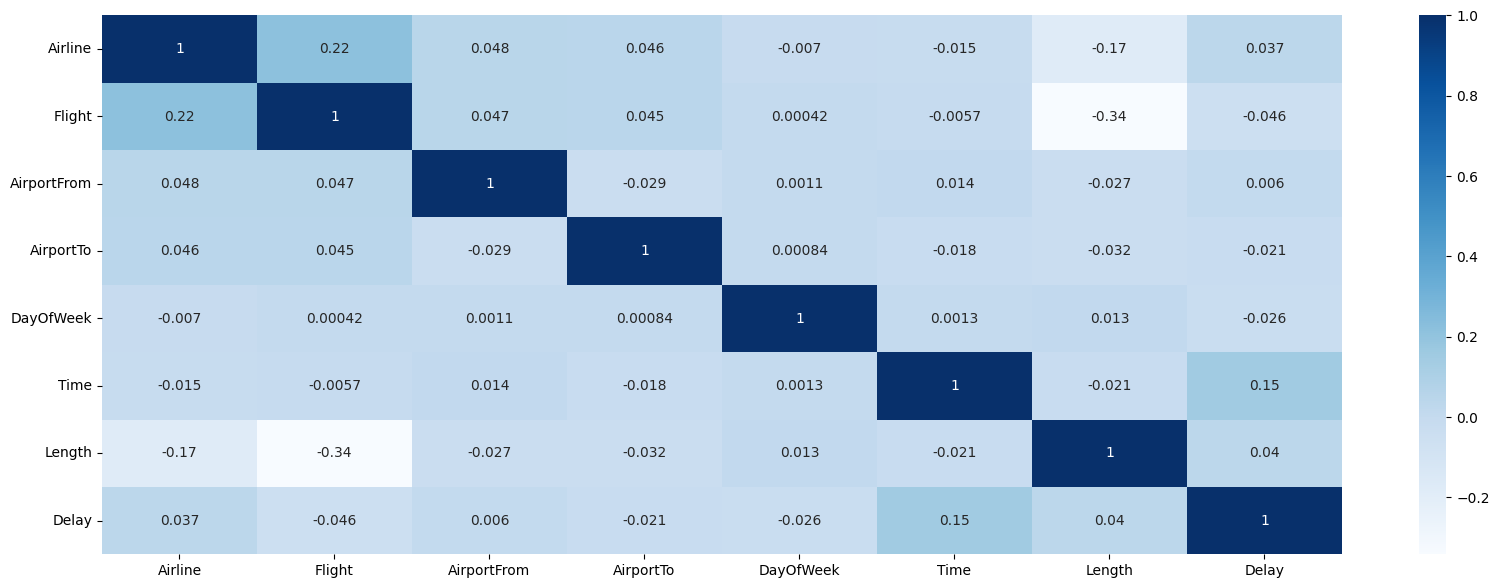

In [17]:
# Heatmap showing correlation between the attributes.

plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()

# Correlation Analysis

The correlation heatmap provides a visual representation of the relationships between various features in the dataset. It is a matrix of colors that illustrates the strength of correlation between pairs of variables.

In the heatmap, each variable is represented on both the x and y axes, and the color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables. The color spectrum varies from lighter shades (e.g., light maroon) for low correlation to darker shades (e.g., dark maroon) for high correlation.

A correlation heatmap serves as a valuable tool for uncovering insights within the dataset. It assists in identifying patterns and trends, as well as pinpointing variables that exhibit strong correlations, whether positive or negative. This information is particularly useful for exploratory data analysis and can aid in the identification of potential predictor variables for statistical modeling.

Learnings from the above correlation map:

*   It is very clear from the heatmap that most of the variables are not dependent on each other
*   Degree of collinearity is significantly less that 0.1 for most variables


In [18]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

h2o_df = h2o.H2OFrame(
   df
)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This step is necessary because H2O has its own data structure that it uses for efficient machine learning operations. Converting our data to an H2O DataFrame allows us to take advantage of the automated machine learning capabilities provided by H2O's AutoML, which can help us build and evaluate machine learning models without having to manually fine-tune many parameters. It's a useful step when working with H2O for predictive modeling tasks.

In [19]:
h2o_df.types

{'Airline': 'int',
 'Flight': 'int',
 'AirportFrom': 'int',
 'AirportTo': 'int',
 'DayOfWeek': 'int',
 'Time': 'int',
 'Length': 'int',
 'Delay': 'int'}

'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', and 'Delay' are all of type 'int'.

This indicates that all columns now contain integer values after the conversion from the original pandas DataFrame to the H2O DataFrame.

In [20]:
# Setting up the data split between training and test dataset.

split_rows = 0.80
df_train, df_test = h2o_df.split_frame([split_rows])

In [21]:
print(df_train.shape)
print(df_test.shape)


(431682, 8)
(107701, 8)


In [22]:
X = h2o_df.columns
print(X)

['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']


In [23]:
# Set target and predictor variables
y = 'Delay'
X.remove(y)  # removing the target variable from our predictors data
print(X)


['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']


By excluding 'Delay' as a predictor, we're preventing the model from using the very variable it's meant to predict, ensuring the model's independence.

This setup is crucial for building and evaluating a machine learning model because it prevents data leakage, ensuring that the model relies on the right information for making predictions.

In [24]:
# Setting up maximum runtime for the AutoML

run_time = 222

auto_ml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

This ensures that AutoML will run for a specific duration, preventing it from running indefinitely. The max_runtime_secs parameter helps manage computational resources and time allocation for model selection and tuning.

 Additionally, we've set a random seed for reproducibility. This configuration allows AutoML to efficiently find the best machine learning model and parameters within the defined time frame.

In [25]:
# Convert the target column 'Delay' to a categorical column
df_train[y] = df_train[y].asfactor()

In many machine learning tasks, it's important to treat the target variable as a categorical variable, especially when dealing with classification problems.

Converting 'Delay' to a categorical column ensures that the machine learning model understands it as a set of discrete categories (e.g., delays and no-delays) rather than a continuous numeric variable.

By performing this conversion, we're preparing the target variable for classification tasks, making it suitable for use in algorithms designed to predict categorical outcomes.

In [26]:
auto_ml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),6/8
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


# Interpreting the above results

**Model Summary:**

- Our model is a Stacked Ensemble consisting of 8 base models.
- It uses a blending strategy to combine predictions from these base models.
- The base models include Generalized Linear Models (GLMs), Gradient Boosting Machines (GBMs), XGBoost models, and a Random Forest model.
- A Generalized Linear Model (GLM) serves as the metalearner for combining these predictions.

**ModelMetricsBinomialGLM (Train Data):**

The model's performance on our training data:

- *Mean Squared Error (MSE)*: It's 0.1901, indicating that, on average, the model's predictions deviate from the actual outcomes.

- *Root Mean Squared Error (RMSE*): It's 0.4360, which is the square root of MSE.

- *Log Loss*: A value of 0.5618 means the model's predicted probabilities align well with actual outcomes.

- *Area Under the Receiver Operating Characteristic curve (AUC)*: It's 0.7841, suggesting that the model effectively discriminates between flight delays and non-delays.

- *Area Under the Precision-Recall curve (AUCPR)*: With a value of 0.7481, the model strikes a good balance between precision and recall.

These metrics show that the model is reasonably accurate in its predictions on the training data.

**Confusion Matrix (Train Data):**

The confusion matrix provides a breakdown of the model's performance on our training data:

- True Positives (TP): 3633 flights correctly predicted as delays.
- True Negatives (TN): 3127 non-delays correctly predicted.
- False Positives (FP): 777 non-delays incorrectly predicted as delays.
- False Negatives (FN): 2383 delays incorrectly predicted as non-delays.

The model has achieved a good number of true positives and true negatives but has also made some false predictions.

**Maximum Metrics (Train Data):**

These metrics help us decide on the optimal probability threshold for our specific needs.

For example,

- The "max F1" threshold of 0.3668 yields an F1 score of 0.6970, which balances precision and recall well for our data.

- The "max accuracy" threshold of 0.4919 achieves an accuracy of 0.7170, which might be the desired balance for our application.

**Gains/Lift Table (Train Data):**

This table shows the model's effectiveness compared to random guessing.

For example, in the first group, the model achieves a lift of 2.20, meaning it performs 2.20 times better than random guessing in predicting delays.


Overall, our model appears to be performing reasonably well on the training data. It effectively distinguishes between flight delays and non-delays, striking a balance between precision and recall at specific probability thresholds.

In [27]:
print(
    auto_ml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20231102_135855     0.72408    0.603571  0.682399                0.37627   0.45649   0.208383
StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_135855  0.723435   0.6041    0.682184                0.373305  0.456724  0.208596
StackedEnsemble_BestOfFamily_2_AutoML_1_20231102_135855  0.723405   0.604166  0.681358                0.378788  0.456763  0.208632
GBM_1_AutoML_1_20231102_135855                           0.722509   0.604932  0.680695                0.378076  0.45712   0.208958
GBM_4_AutoML_1_20231102_135855                           0.716592   0.610275  0.673578                0.376146  0.459554  0.21119
XGBoost_2_AutoML_1_20231102_135855                       0.714394   0.610563  0.670869                0.375756  0.459812  0.211428
XGBoost_1_AutoML_1_20231102_135855                       0.712023   0.616318  0.6703

# Interpretation

**StackedEnsemble_AllModels_1_AutoML_1_20231102_135855**: This model has an AUC of 0.72408, which is a good measure of its ability to distinguish between positive and negative cases. The logloss is 0.603571, indicating accurate probability predictions. AUCPR is 0.682399, showing good overall performance. The mean_per_class_error is 0.37627, indicating an error rate for class predictions. RMSE and MSE are 0.45649 and 0.208383, respectively, measuring the accuracy of regression predictions.

**StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_135855**: This model has similar performance to the first Stacked Ensemble with slightly worse metrics.

**StackedEnsemble_BestOfFamily_2_AutoML_1_20231102_135855**: Another Stacked Ensemble with slightly worse metrics than the first one.

**GBM_1_AutoML_1_20231102_135855**: This is a Gradient Boosting Machine model with an AUC of 0.722509, good logloss, and AUCPR values.

**GBM_4_AutoML_1_20231102_135855**: Another Gradient Boosting Machine with slightly worse metrics than the previous GBM model.

**XGBoost_2_AutoML_1_20231102_135855**: An XGBoost model with decent performance.

**XGBoost_1_AutoML_1_20231102_135855**: Another XGBoost model with similar performance.

**GBM_3_AutoML_1_20231102_135855**: Another Gradient Boosting Machine model.

**GBM_2_AutoML_1_20231102_135855**: Yet another Gradient Boosting Machine model with slightly worse metrics.

**DRF_1_AutoML_1_20231102_135855**: A Distributed Random Forest model with lower AUC and other metrics.

The Stacked Ensemble models are at the top of the leaderboard, indicating that they combine the predictions of various models to achieve better performance.

In [28]:
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict


{'StackedEnsemble_AllModels_1_AutoML_1_20231102_135855': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_135855': 1,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20231102_135855': 2,
 'GBM_1_AutoML_1_20231102_135855': 3,
 'GLM_1_AutoML_1_20231102_135855': 10}

We've created a Python dictionary called models_dict that maps model names to their corresponding indices. The dictionary has the following entries:

'StackedEnsemble_AllModels_1_AutoML_1_20231102_135855': This is the first model in the leaderboard, indicated by the index 0.

'StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_135855': The second model in the leaderboard, with index 1.

'StackedEnsemble_BestOfFamily_2_AutoML_1_20231102_135855': The third model in the leaderboard, with index 2.

'GBM_1_AutoML_1_20231102_135855': The fourth model in the leaderboard, with index 3.

'GLM_1_AutoML_1_20231102_135855': The last model in the leaderboard, with index 10.

These indices can be used to reference specific models in our code, making it easier to work with them programmatically.

In [29]:
print(model_index)
best_model = h2o.get_model(auto_ml.leaderboard[model_index, "model_id"])


3


We have successfully selected the best model from our AutoML run, which is a **Gradient Boosting Machine (GBM)** model. This model was identified as the best-performing model in our experiment.

In [30]:
best_model.algo

'gbm'

In [31]:
%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-31-57ae2e92d3fa>:6: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


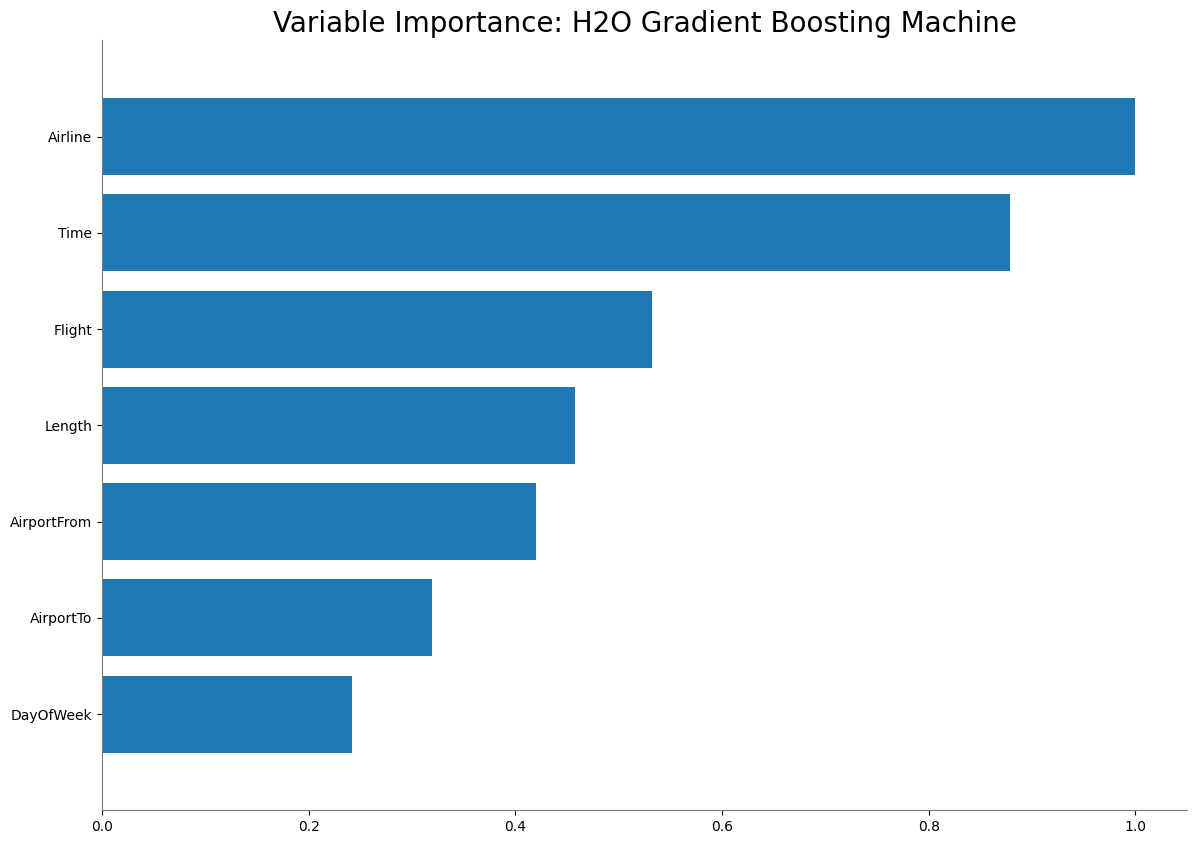

<Figure size 640x480 with 0 Axes>

In [32]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

Variable importance plots are commonly used to understand which features or variables had the most impact on the model's predictions. These plots help in feature selection and understanding the model's decision-making process.

- From the above graph, we can see that Airline, Time and Flight are the variables that had the most impact on the model's predictions

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-33-7338a7081ba0>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


10
glm


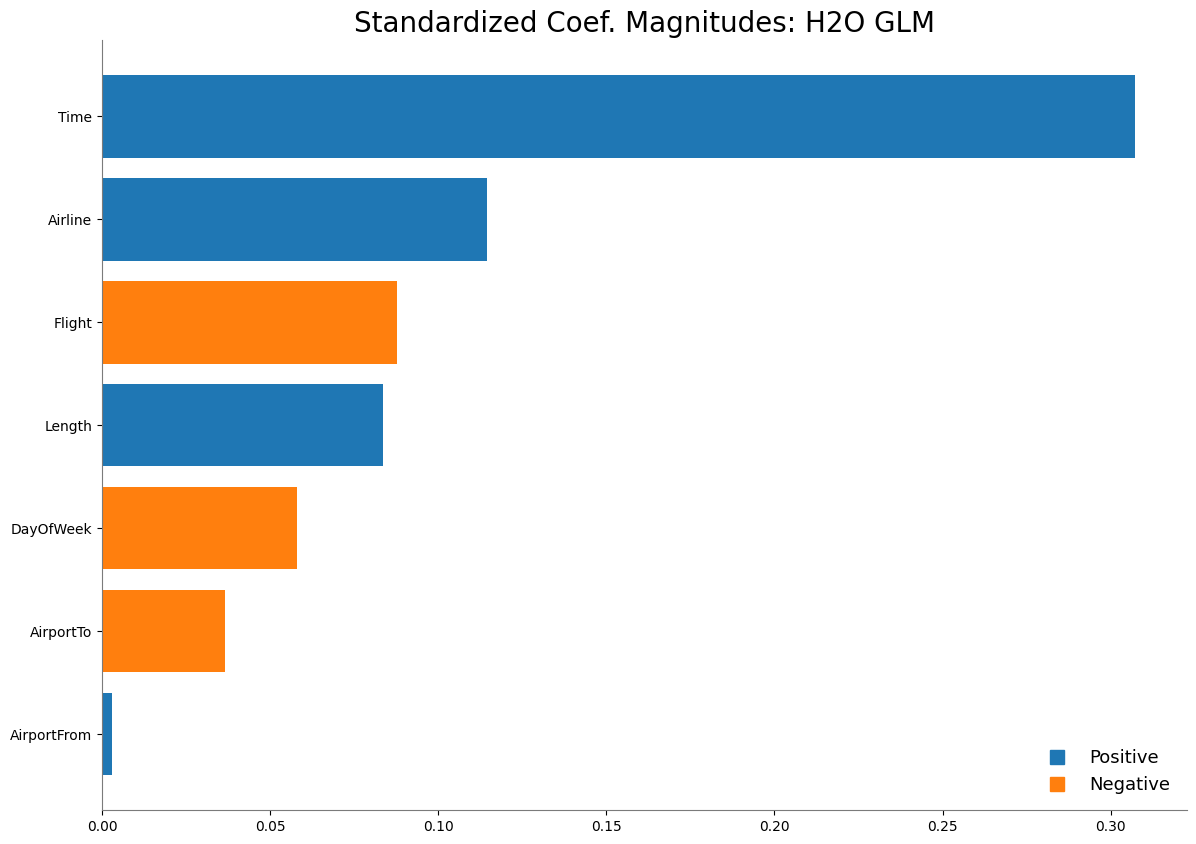

In [33]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

The standard coefficient plot is a common tool for interpreting GLM models. It displays the standardized coefficients of the model's features, which helps us understand the strength and direction of their impact on the model's predictions. It's a valuable way to identify which features are positively or negatively associated with the target variable and to what extent. This information is critical for understanding the relationships between the features and the target variable in a GLM context.

- From the above plot, we can conclude that the variables 'Time' and 'Airline' are associated positively with our target variale 'Delay' whereas 'Flight' is associated negatively.

In [34]:
print(best_model.rmse(train=True))

0.4339895599537087


RMSE is a common metric used to evaluate the performance of regression models. It measures the average magnitude of errors between the predicted values and the actual target values. A lower RMSE indicates a better fit of the model to the training data.

- In this context, an RMSE of 0.43399 suggests that the best model has a relatively good fit to the training data, and the predicted values are, on average, close to the actual values.

In [35]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [36]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.2100331384691484,
 'rmse': 0.4582937251033974,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.607538010868753,
 'auc': 0.7198124337669125,
 'gini': 0.439624867533825}

# Interpretation

**mse (Mean Squared Error)**: The Mean Squared Error on the test data is approximately 0.2100. This value represents the average squared difference between predicted values and actual values. A lower MSE indicates that your model's predictions are closer to the actual values, which is a good sign.

**rmse (Root Mean Squared Error)**: The Root Mean Squared Error on the test data is around 0.4583. This is the square root of the MSE and provides an estimate of the average magnitude of errors in our model's predictions. As with MSE, a lower RMSE is better.

**null_degrees_of_freedom and residual_degrees_of_freedom**: These degrees of freedom values are not available for our model on the test data. Degrees of freedom are usually associated with statistical models and can indicate the number of parameters used in the model.

**residual_deviance and null_deviance**: These values are not available for our model on the test data. They are often associated with generalized linear models (GLMs) and represent goodness-of-fit statistics.

**logloss (Logarithmic Loss)**: The Logarithmic Loss on the test data is approximately 0.6075. Logloss is a measure of the quality of a classification model, and lower values are desirable, as they indicate better model performance in terms of classification.

**auc (Area Under the ROC Curve)**: The AUC on the test data is approximately 0.7198. AUC is a measure of a classification model's ability to distinguish between positive and negative classes. An AUC value of 1.0 represents perfect discrimination, while 0.5 represents random guessing. So, an AUC of 0.7198 is indicative of reasonably good discrimination.

**gini**: The Gini coefficient on the test data is approximately 0.4396. Gini is another measure of a classification model's performance, particularly used in the context of decision trees and random forests. Higher Gini values are indicative of better model performance.

These statistics provide valuable insights into how well our model is performing on unseen test data. In general, lower RMSE and Logloss, and higher AUC and Gini values are indicative of better model performance. It seems like our model is doing reasonably well, but the interpretation may depend on the specific domain and problem we are addressing.

In [37]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [38]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

        predict        p0        p1
0             1  0.328731  0.671269
1             1  0.562957  0.437043
2             1  0.120987  0.879013
3             1  0.657885  0.342115
4             1  0.594946  0.405054
...         ...       ...       ...
107696        1  0.510917  0.489083
107697        0  0.806589  0.193411
107698        1  0.581781  0.418219
107699        1  0.468073  0.531927
107700        1  0.669450  0.330550

[107701 rows x 3 columns]


The column 'predict' contains the predicted class labels (0 or 1) for each row in our test dataset.

p0 and p1: These columns provide the probability scores for each row being in class 0 (p0) or class 1 (p1). These scores represent the model's confidence in its predictions.

In [39]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

,Delay
0,1
1,0
2,1
3,0
4,1
...,...
107696,1
107697,0
107698,0
107699,1


The DataFrame contains a single column labeled "Delay," which represents the actual target values (0 or 1) for each corresponding row in our test dataset.

In [71]:
print(X)

['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']


# Regularization

In [40]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

flight_glm = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
flight_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=0, nfolds=5
)  # RIDGE Regularization
flight_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=5
)  # LASSO Regularization
flight_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

We've created several Generalized Linear Models (GLMs) using H2O with different configurations and regularization techniques. Here's a brief summary of each model:

**flight_glm**: This is a GLM with binomial family and elastic net regularization (a combination of L1 and L2 regularization). We've set lambda_ to 0 (which corresponds to a 50-50 mix of L1 and L2 regularization) and enabled the computation of p-values. It uses 5-fold cross-validation.

**flight_glm_regularization_ridge**: This GLM also uses the binomial family but with only ridge (L2) regularization. We've set alpha to 0, which means it's purely ridge regularization. It uses 5-fold cross-validation.

**flight_glm_regularization_lasso**: Similar to the previous model but with pure lasso (L1) regularization. We've set alpha to 1, which corresponds to lasso regularization. It uses 5-fold cross-validation.

**flight_glm_regularization_lamba_search**: This GLM uses the binomial family and performs a lambda search. Lambda search automatically finds the best lambda value for regularization based on the data and model performance.

These models are configured with different regularization techniques and settings to see how they perform on our dataset.

In [41]:
flight_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698933427482_152


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              7                             7                              3                       py_4_sid_9fb4

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.2397053584503117
RMSE: 0.4895971389319097
LogLoss: 0.6721018937911057
AUC: 0.6031309609519478
AUCPR: 0.5179687507934573
Gini: 0.2062619219038957
Null degrees of freedom: 431681
Residual degrees of freedom: 431674
Null deviance: 593359.8246082708
Residual deviance: 580268.5794310642
AIC: 580284.5794310642

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34535977865931694
       0      1       Error    Rate
-----  -----  ------  -------  -------------------
0      40750  198479  0.8297   (198479.0/239229.0)
1      15515  176938  0.0806   (15515.0/192453.0)
Total  56265  375417  0.4957   (213994.0/431682.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.34536      0.623164  319
max f2                       0.174498     0.80089   399
max f0point5                 0.412022     0.53933   246
max accuracy                 0.469161     0.578234  182
max precision                0.554853     0.549312  89
max recall                   0.174498     1         399
max specificity              0.767014     0.999992  0
max absolute_mcc             0.403347     0.162595  255
max min_per_class_accuracy   0.444811     0.575582  210
max mean_per_class_accuracy  0.415719     0.579581  242
max tns                      0.767014     239227    0
max fns                      0.767014     192451    0
max fps                      0.210541     239229    398
max tps                      0.174498     192453    399
max tnr                      0.767014     0.999992  0
max fnr                      0.767014     0.99999   0
max fpr                      0.210541     1         398
max tpr                      0.174498     1         399

Gains/Lift Table: Avg response rate: 44.58 %, avg score:  0.87 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0100027                   0.0134352          1.0701    1.0701             0.477073         0.0148567   0.477073                    0.0148567           0.0107039       0.0107039                  7.00987    7.00987            0.00126526
2        0.0200032                   0.0125151          1.09269   1.08139            0.487144         0.0129093   0.482108                    0.0138831           0.0109273       0.0216313                  9.26888    8.13924            0.00293787
3        0.0300036                   0.0120306          1.04645   1.06974            0.466528         0.0122487   0.476915                    0.0133383           0.0104649       0.0320961                  4.64456    6.97444            0.003776
4        0.0400017                   0.0117169          1.07059   1.06996            0.477294         0.0118634   0.477009                    0.0129697           0.0107039       0.0428001                  7.05946    6.99569            0.00504962
5  

# Interpretations

**Model Type**: We've used a Generalized Linear Model (GLM) with a binomial family, which is suitable for binary classification tasks. The binomial family is commonly used for problems where you're predicting one of two classes (e.g., yes/no, 1/0).

**Regularization**: We applied Elastic Net regularization, which is a combination of L1 (Lasso) and L2 (Ridge) regularization. This helps prevent overfitting and encourages feature selection. The specific combination of L1 and L2 regularization is determined by the alpha parameter.

**Number of Predictors**: The model used 7 predictors (features) for making predictions.

**Training Metrics**:

*MSE (Mean Squared Error)*: This measures the average squared difference between the predicted and actual outcomes. A lower MSE indicates a better fit to the data.

*RMSE (Root Mean Squared Error)*: The square root of MSE. In this case, it's 0.4896, which means, on average, predictions are off by approximately 0.49 units.

*LogLoss*: Logarithmic loss, a common metric for evaluating binary classification models. Lower values are better.

*AUC (Area Under the ROC Curve)*: A value of 0.6031 indicates that the model is better than random guessing. It's a measure of the model's ability to discriminate between the two classes.

*AUCPR (Area Under the Precision-Recall Curve)*: A value of 0.5180 indicates the model's ability to classify positive instances while maintaining precision.

*Gini Coefficient*: The Gini index measures the inequality among values of a frequency distribution. A higher Gini coefficient suggests better discrimination.

*Degrees of Freedom*: Information about the model's complexity.
Deviance: Measures the difference between the model's predicted and actual outcomes.

*AIC (Akaike Information Criterion)*: Measures the quality of the model, considering both the goodness of fit and the model's complexity. A lower AIC indicates a better model.

**Confusion Matrix:**

- True Positives (TP): The model correctly predicted 192,453 positive instances.
- False Positives (FP): The model incorrectly predicted 398 negative instances as positive.
- True Negatives (TN): The model correctly predicted 239,227 negative instances.
- False Negatives (FN): The model incorrectly predicted 192,451 positive instances as negative.

These results provide insights into how well the model is performing on the training data. We can see that the model is making a substantial number of false positives (398) and false negatives (192,451), indicating some level of misclassification. It's essential to evaluate the model on a separate test dataset to determine if it generalizes well.

Additionally, feature importance information is provided, indicating the relative importance of each predictor in making predictions. In this case, "Time" has the highest importance.



# Lasso Regularization

In [42]:
flight_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698933427482_170


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 7.501E-5 )  7                             7                              2                       py_4_sid_9fb4

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.2397055441499968
RMSE: 0.48959732857726745
LogLoss: 0.6721020411933734
AUC: 0.6031335210981855
AUCPR: 0.5179476176980653
Gini: 0.20626704219637104
Null degrees of freedom: 431681
Residual degrees of freedom: 431674
Null deviance: 593359.8246082708
Residual deviance: 580268.7066928756
AIC: 580284.7066928756

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3426577815600579
       0      1       Error    Rate
-----  -----  ------  -------  -------------------
0      37958  201271  0.8413   (201271.0/239229.0)
1      14274  178179  0.0742   (14274.0/192453.0)
Total  52232  379450  0.4993   (215545.0/431682.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.342658     0.623109  323
max f2                       0.175013     0.80089   399
max f0point5                 0.413648     0.53936   244
max accuracy                 0.476639     0.578284  171
max precision                0.553421     0.549435  90
max recall                   0.175013     1         399
max specificity              0.766046     0.999992  0
max absolute_mcc             0.406231     0.162523  251
max min_per_class_accuracy   0.444556     0.574788  207
max mean_per_class_accuracy  0.415573     0.5796    242
max tns                      0.766046     239227    0
max fns                      0.766046     192451    0
max fps                      0.211237     239229    398
max tps                      0.175013     192453    399
max tnr                      0.766046     0.999992  0
max fnr                      0.766046     0.99999   0
max fpr                      0.211237     1         398
max tpr                      0.175013     1         399

Gains/Lift Table: Avg response rate: 44.58 %, avg score: 44.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100027                   0.639472           1.14958   1.14958            0.512506         0.667614  0.512506                    0.667614            0.0114989       0.0114989                  14.9577   14.9577            0.00269981
2        0.0200008                   0.617527           1.12257   1.13607            0.500463         0.627337  0.506486                    0.64748             0.0112235       0.0227224                  12.2565   13.6074            0.00491105
3        0.0300013                   0.604524           1.22362   1.16526            0.545518         0.610603  0.519497                    0.635188            0.0122368       0.0349592                  22.3624   16.5258            0.00894645
4        0.0400017                   0.59518            1.26155   1.18933            0.562428         0.599717  0.530229                    0.62632             0.0126161       0.0475753                  26.1554   18.9332           

# Interpretation of the results

**Model Details:**

The model we trained is a Generalized Linear Model (GLM) with Lasso (L1) regularization, where lambda is set to 7.501E-5.

The GLM is of the binomial family, which makes it suitable for binary classification.

The model used 7 predictors for making predictions.

It went through 2 iterations during the training process.

The training data used is named py_4_sid_9fb4.

**Training Metrics:**

*Mean Squared Error (MSE)* is 0.2397, indicating the average squared difference between predicted and actual outcomes.

*Root Mean Squared Error (RMSE)* is 0.4896, which is the square root of MSE.
Log Loss (LogLoss) is 0.6721, a measure of classification accuracy.

*AUC (Area Under the Receiver Operating Characteristic Curve)* is 0.6031, indicating the model's ability to discriminate between classes.

*AUCPR (Area Under the Precision-Recall Curve)* is 0.5179, measuring the model's precision-recall trade-off.

*Gini* is 0.2063, a measure of discrimination quality.
Degrees of freedom, deviance, and Akaike Information Criterion (AIC) are model complexity-related metrics.

**Confusion Matrix:**

- True Negatives (TN): The model correctly predicted "0" for 37958 instances where the true class was also "0." These are instances the model correctly identified as not belonging to the positive class.
- False Positives (FP): The model incorrectly predicted "1" for 201271 instances where the true class was "0." These are instances the model predicted as positive class when they were actually negative.
- True Positives (TP): The model correctly predicted "1" for 178179 instances where the true class was also "1." These are instances the model correctly identified as belonging to the positive class.
- False Negatives (FN): The model incorrectly predicted "0" for 14274 instances where the true class was "1." These are instances the model predicted as the negative class when they were actually positive.

**Gains/Lift Table:**

This table shows the response rate and cumulative lift at various percentiles.

**Variable Importances:**

This section lists the relative importance of the predictors used in the model. The "Time" variable is the most important feature, followed by "Airline," "Flight," "Length," "DayOfWeek," "AirportTo," and "AirportFrom."

In [43]:
lambda_search = flight_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [44]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698933427482_188


GLM Model: summary
    family    link    regularization                                 lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.005781 )  nlambda = 100, lambda.max = 0.15, lambda.min = 0.005781, lambda.1se = -1.0  7                             6                              37                      py_4_sid_9fb4

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.23977336813797903
RMSE: 0.48966658874991564
LogLoss: 0.672242878820569
AUC: 0.6028634468471895
AUCPR: 0.5166530158291786
Gini: 0.20572689369437902
Null degrees of freedom: 431681
Residual degrees of freedom: 431675
Null deviance: 593359.8246082708
Residual deviance: 580390.3008300416
AIC: 580404.3008300416

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3528914758499845
       0      1       Error    Rate
-----  -----  ------  -------  -------------------
0      41426  197803  0.8268   (197803.0/239229.0)
1      15554  176899  0.0808   (15554.0/192453.0)
Total  56980  374702  0.4942   (213357.0/431682.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.352891     0.623812  321
max f2                       0.19275      0.80089   399
max f0point5                 0.413285     0.5399    248
max accuracy                 0.477371     0.57739   171
max precision                0.541726     0.545235  94
max recall                   0.19275      1         399
max specificity              0.735577     0.999992  0
max absolute_mcc             0.410038     0.164058  252
max min_per_class_accuracy   0.444619     0.57404   210
max mean_per_class_accuracy  0.41661      0.580119  244
max tns                      0.735577     239227    0
max fns                      0.735577     192451    0
max fps                      0.22927      239229    398
max tps                      0.19275      192453    399
max tnr                      0.735577     0.999992  0
max fnr                      0.735577     0.99999   0
max fpr                      0.22927      1         398
max tpr                      0.19275      1         399

Gains/Lift Table: Avg response rate: 44.58 %, avg score: 44.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100004                   0.622378           1.12075   1.12075            0.499653         0.647748  0.499653                    0.647748            0.0112079       0.0112079                  12.0746   12.0746            0.00217893
2        0.0200032                   0.603118           1.11893   1.11984            0.498842         0.611845  0.499247                    0.629794            0.0111923       0.0224003                  11.8928   11.9837            0.00432554
3        0.0300013                   0.591206           1.21507   1.15158            0.541705         0.596704  0.513397                    0.618767            0.0121484       0.0345487    

# Interpretation

**Model Summary:**

The model is using a binomial family and a logit link function, indicating that it's designed for binary classification tasks. Given your data, it's likely predicting binary outcomes, such as whether a flight is delayed (1) or not delayed (0).

**Model Metrics:**

The metrics provided in this section are specific to how well the model performs on your data. For example, the "AUC" value of approximately 0.602 suggests that our model can distinguish between delayed and not delayed flights with a moderate level of accuracy.

**Confusion Matrix:**

The confusion matrix is a tabulation of the model's predictions compared to the actual outcomes in our dataset. In this case, it shows the number of flights correctly classified as delayed (true positives), flights incorrectly classified as delayed (false positives), flights correctly classified as not delayed (true negatives), and flights incorrectly classified as not delayed (false negatives). The error rates provide a quick summary of the model's overall accuracy.

**Maximum Metrics:**

The "Maximum Metrics" section identifies the optimal classification threshold (approximately 0.3529) for our data based on the F1 score. This threshold is where the model achieves the best trade-off between precision and recall for your specific dataset.

**Gains/Lift Table:**

The "Gains/Lift Table" section provides information about how well our model performs at various thresholds. This information helps us understand the model's behavior when setting different decision thresholds for classifying flights as delayed or not delayed.

**Variable Importances:**

The variable importances section tells us which features or predictors are most influential in your model. The "Time" variable appears to be the most important, followed by other variables like "Airline," "Flight," and "Length"

In [45]:
coeff_table = flight_glm._model_json["output"]["coefficients_table"]

In [46]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-1.185916,0.016846,-70.396006,0.000000e+00,-0.223935
1,Airline,0.024843,0.000672,36.955261,5.995835e-299,0.118661
2,Flight,-0.000044,0.000002,-27.203983,5.827105e-163,-0.091919
3,AirportFrom,0.000060,0.000035,1.742493,8.142230e-02,0.005429
4,AirportTo,-0.000412,0.000035,-11.904563,1.120484e-32,-0.037109
5,DayOfWeek,-0.029637,0.001626,-18.222559,3.417914e-74,-0.056672
6,Time,0.001124,0.000011,99.367337,0.000000e+00,0.312579
7,Length,0.001164,0.000047,24.568219,2.762738e-133,0.081651


#Interpretations

**Intercept:**

- Coefficient: -1.185916
- This represents the model's baseline prediction when all other predictor variables are zero.
- The model starts with this value as a base prediction.

**Airline:**

- For a one-unit increase in the "Airline" predictor, the log-odds of the response variable (a binary outcome) increase by 0.024843 when all other predictors are held constant.
- The low p-value (close to zero) indicates that the "Airline" predictor is highly significant, suggesting it has a strong influence on the response variable.
- The large z-value (positive) indicates the strength and significance of this relationship.
- The standardized coefficient shows the importance of this predictor relative to others after standardization.

**Flight:**

- For a one-unit increase in the "Flight" predictor, the log-odds of the response variable decrease by 0.000044 when all other predictors are held constant.
- Similar to "Airline," the low p-value and large negative z-value indicate the significance of this predictor, but its effect is negative.

**AirportFrom, AirportTo, DayOfWeek, Time, and Length:**

These predictors have similar information, including coefficients, standard errors, z-values, p-values, and standardized coefficients.
We can interpret them in the same way as the "Airline" and "Flight" predictors.


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_4_20231102_12636,0.722127,0.604889,0.680996,0.369785,0.45709,0.208932,13150,0.0538,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_4_20231102_12636,0.721406,0.605292,0.680479,0.374323,0.457294,0.209118,9275,0.034817,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_4_20231102_12636,0.721016,0.605681,0.679842,0.369187,0.457472,0.209281,14767,0.046204,StackedEnsemble
GBM_1_AutoML_4_20231102_12636,0.720112,0.606204,0.679035,0.36726,0.457733,0.209519,41856,0.025196,GBM
GBM_4_AutoML_4_20231102_12636,0.715534,0.610513,0.672945,0.385048,0.45967,0.211297,15732,0.012955,GBM
XGBoost_2_AutoML_4_20231102_12636,0.713555,0.610897,0.672009,0.377241,0.459904,0.211512,18613,0.00352,XGBoost
XGBoost_1_AutoML_4_20231102_12636,0.70935,0.618989,0.666118,0.376597,0.463155,0.214513,45526,0.00651,XGBoost
GBM_3_AutoML_4_20231102_12636,0.709341,0.614476,0.667205,0.379177,0.461613,0.213086,16162,0.015538,GBM
GBM_2_AutoML_4_20231102_12636,0.701127,0.621134,0.65794,0.393475,0.464682,0.21593,16223,0.014614,GBM
DRF_1_AutoML_4_20231102_12636,0.692642,0.653225,0.644437,0.404011,0.472071,0.222851,18314,0.008617,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

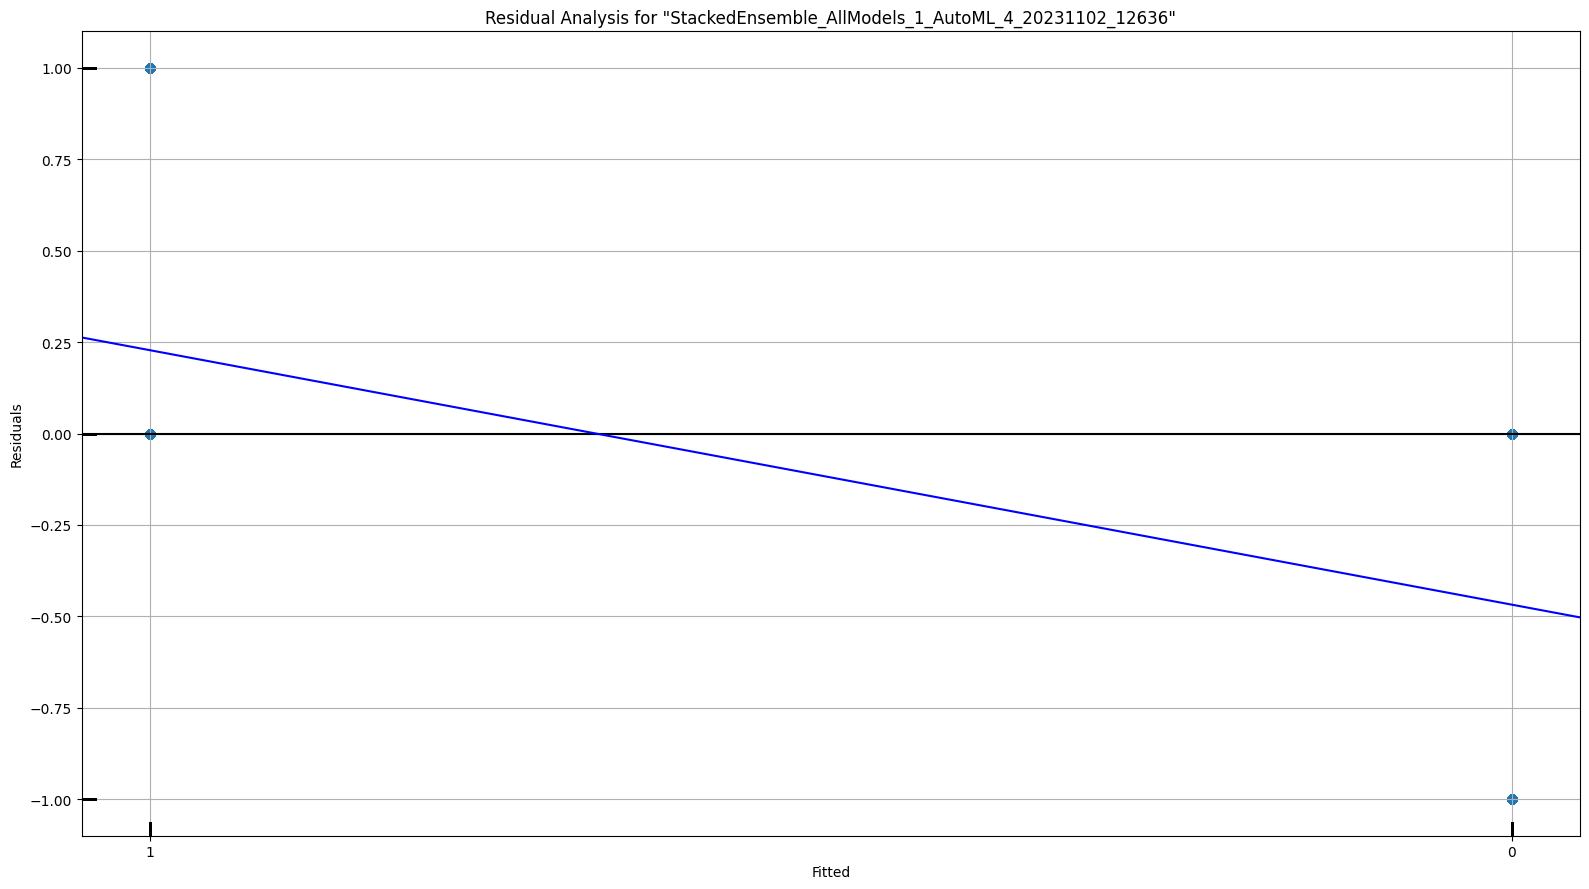

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

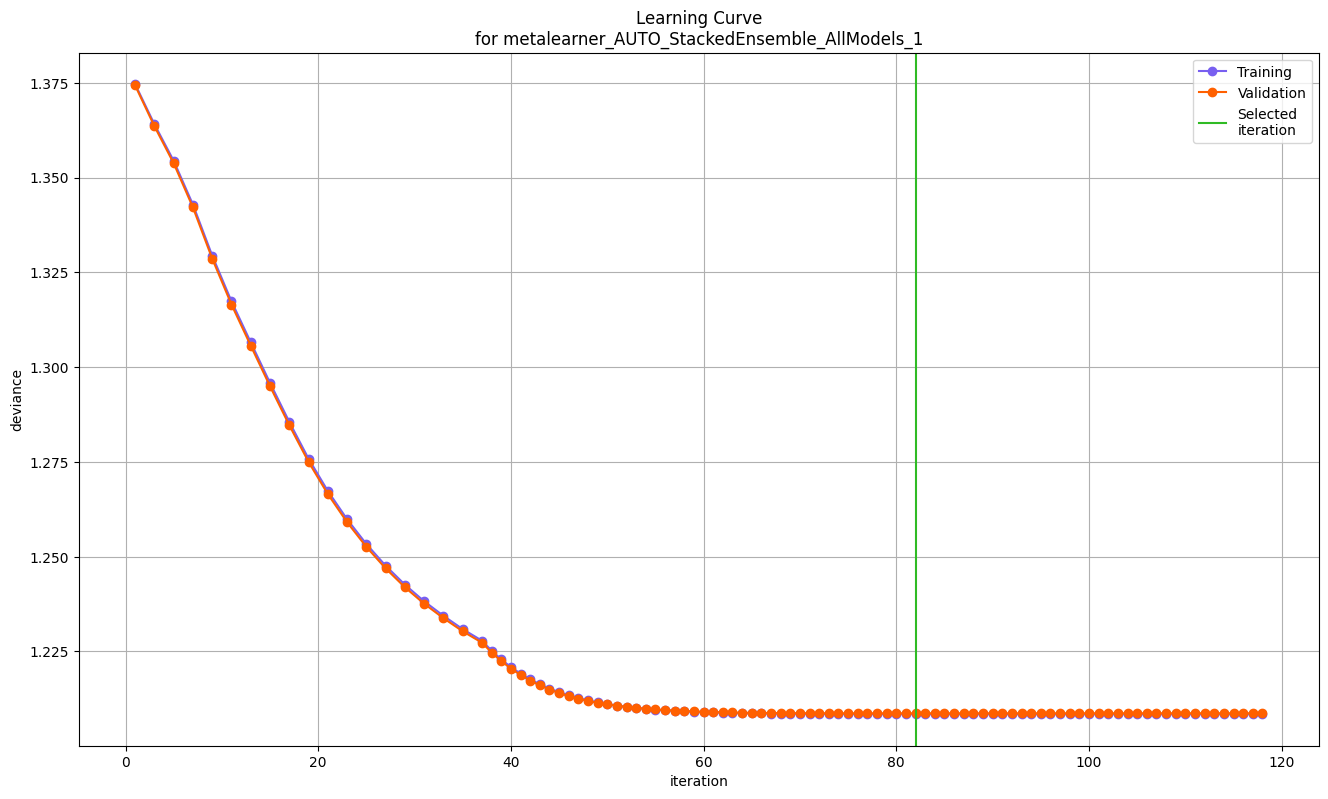

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

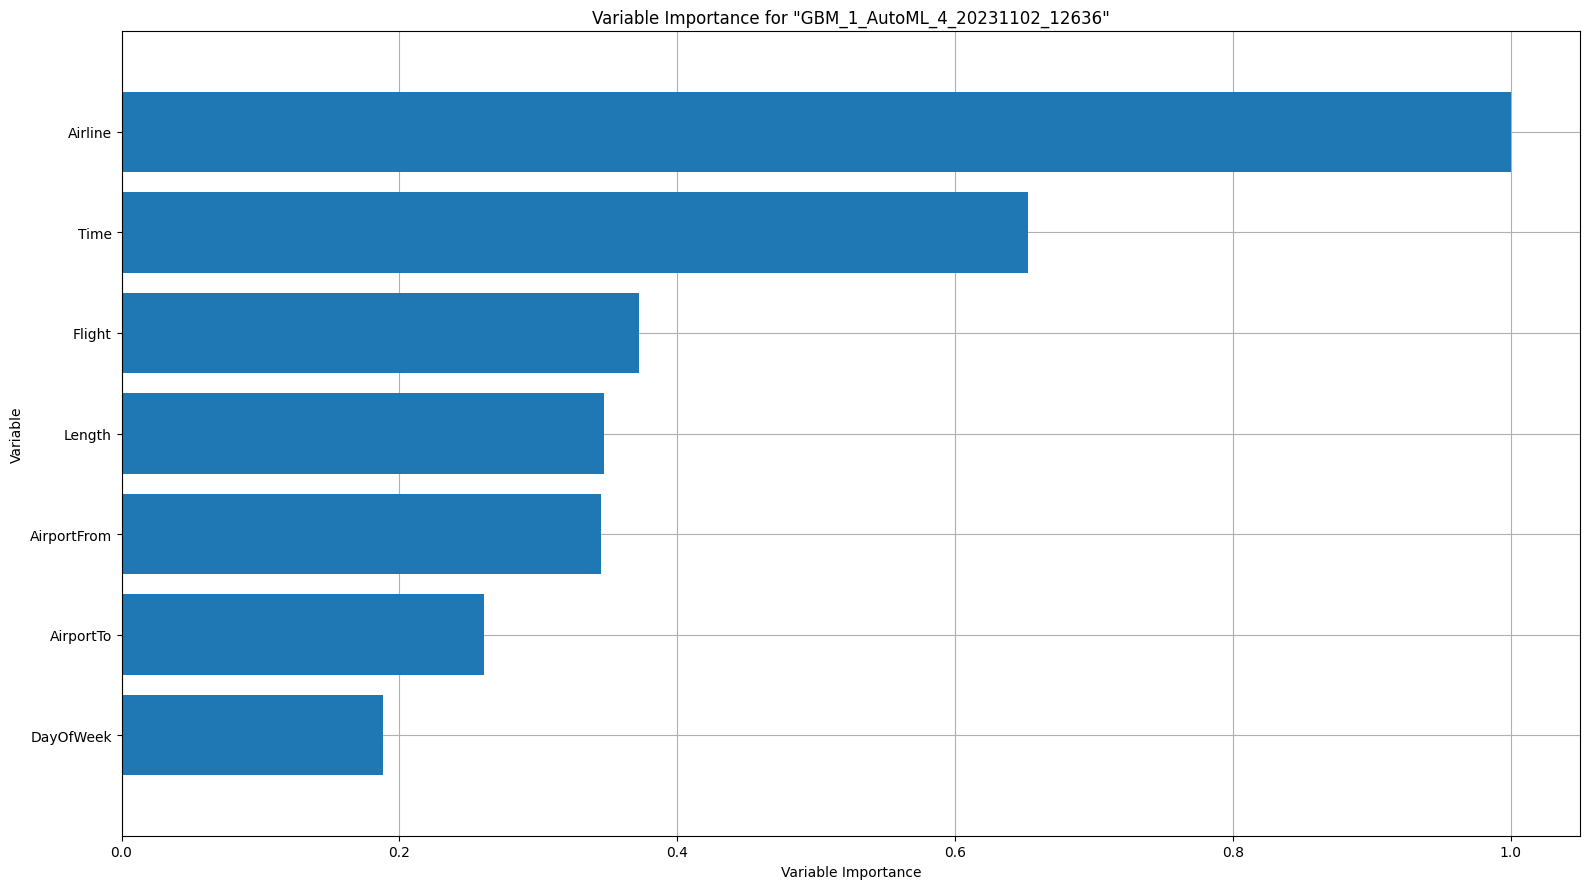

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

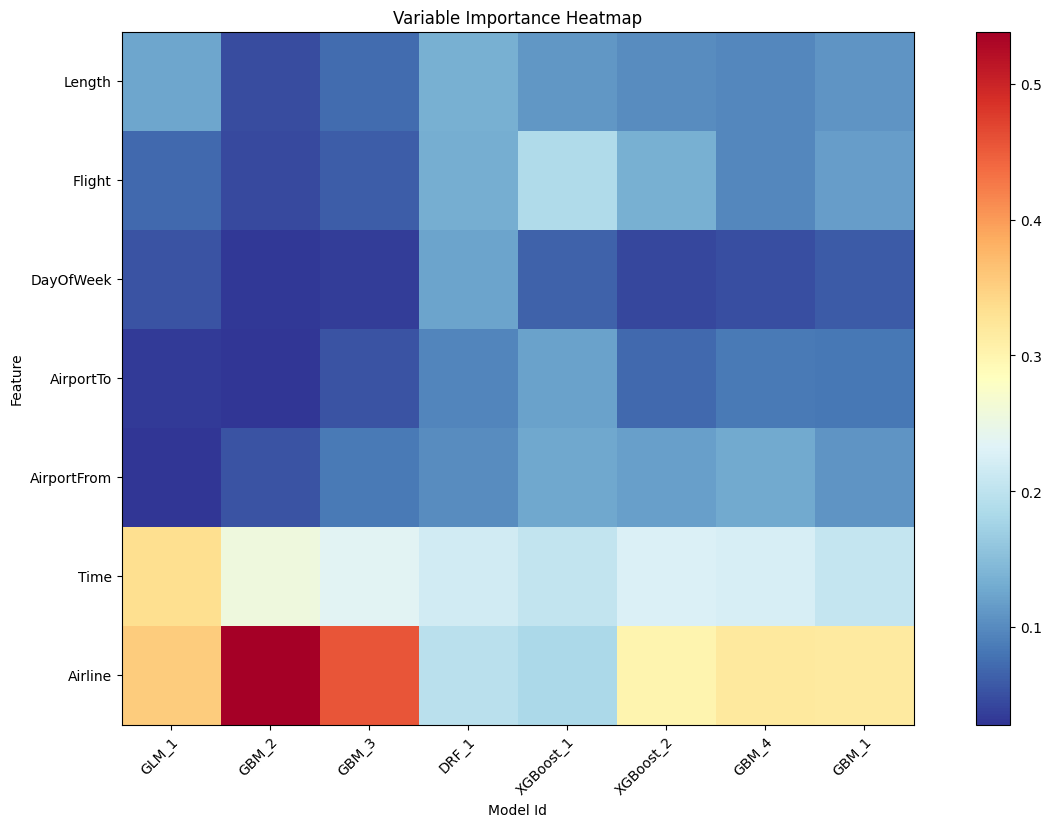

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

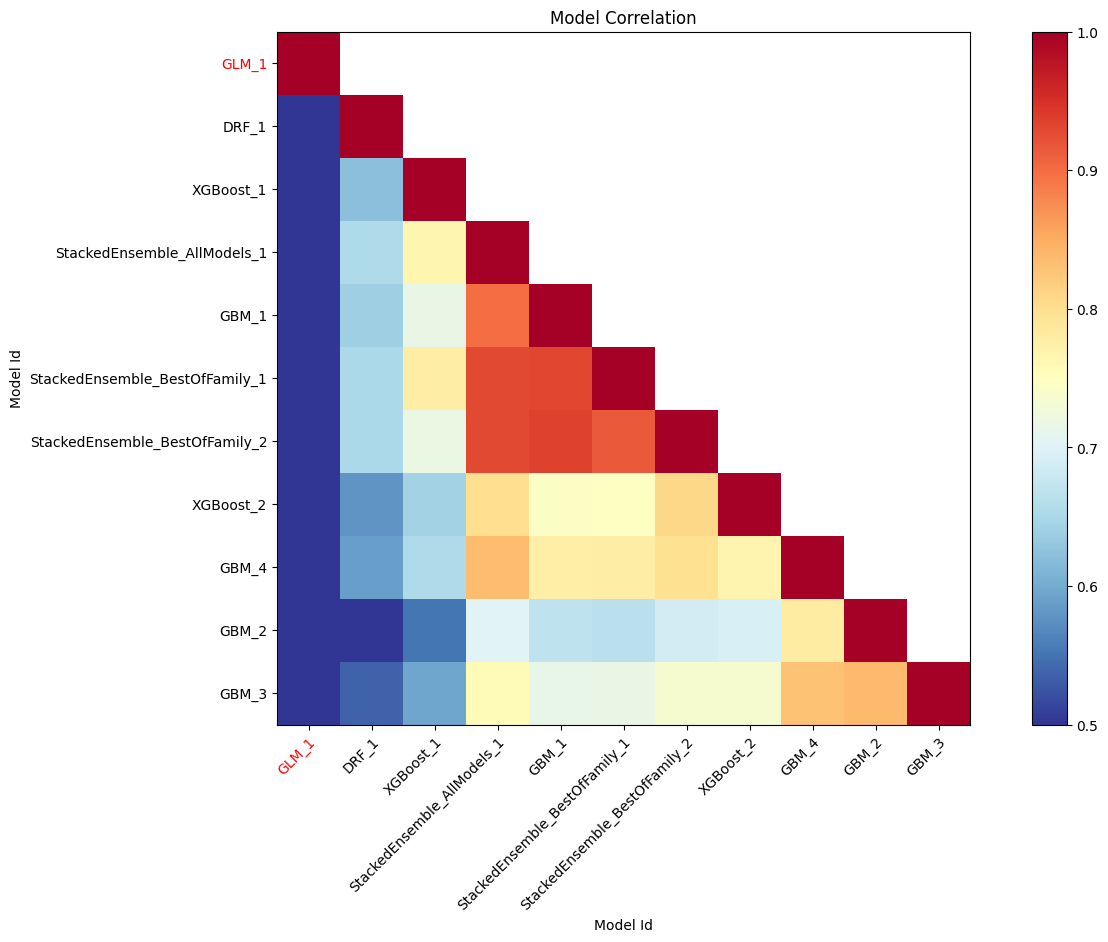

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

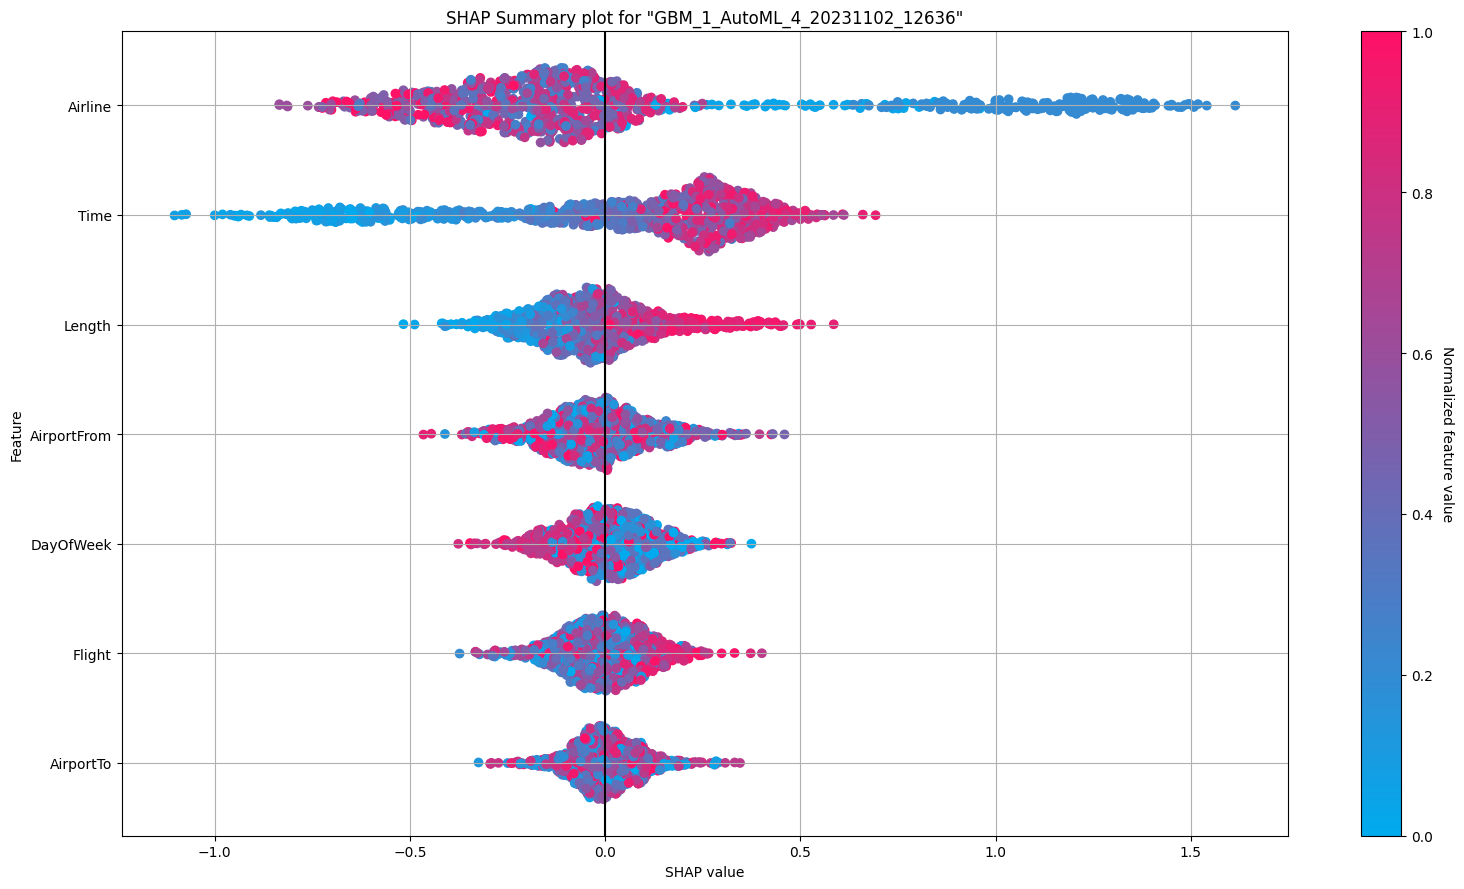

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

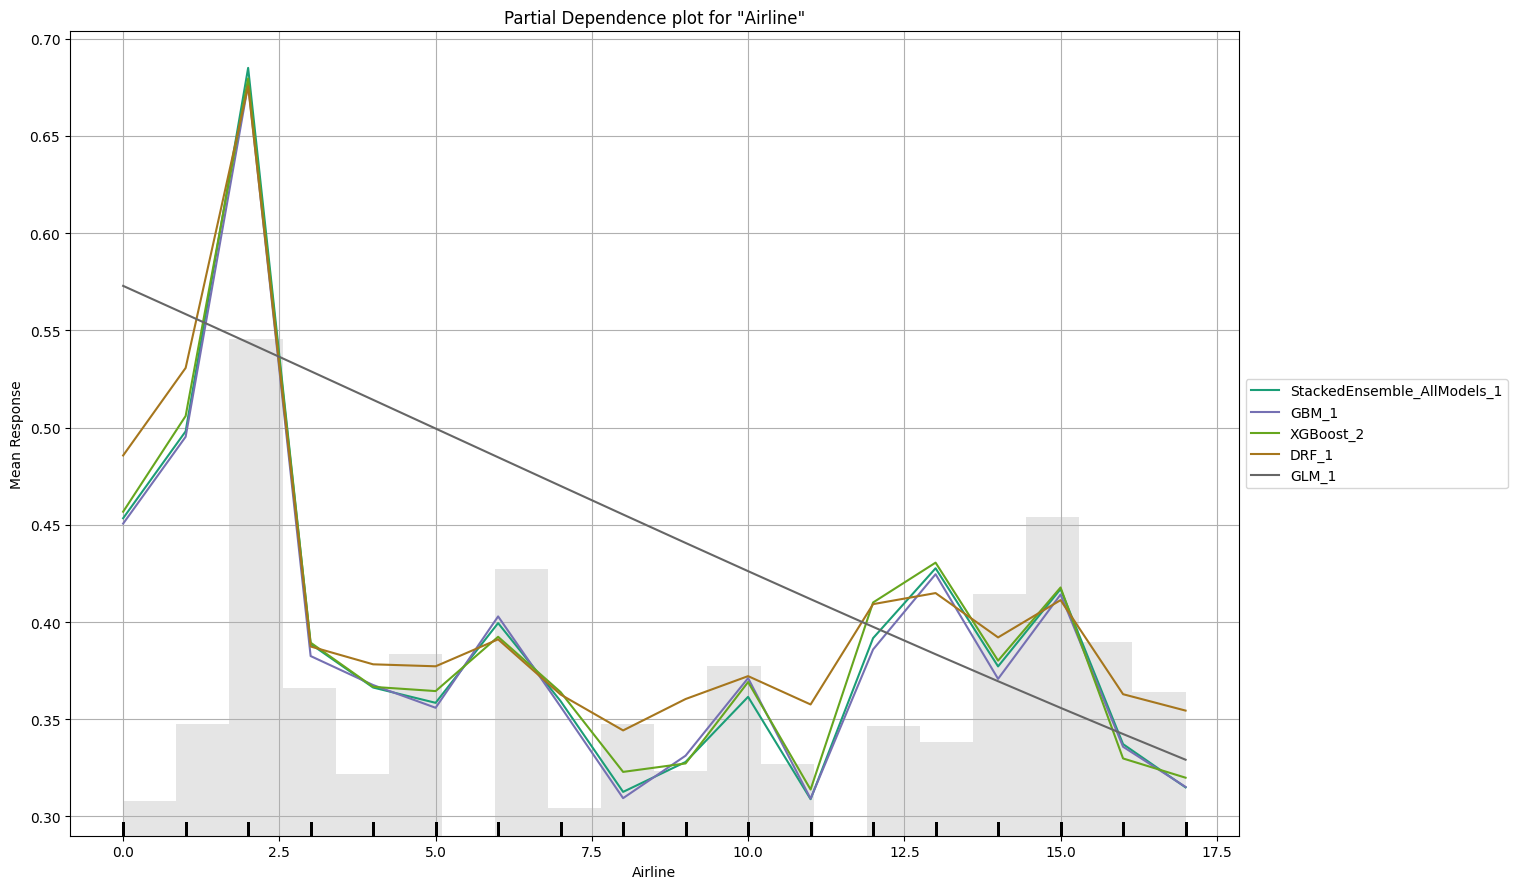

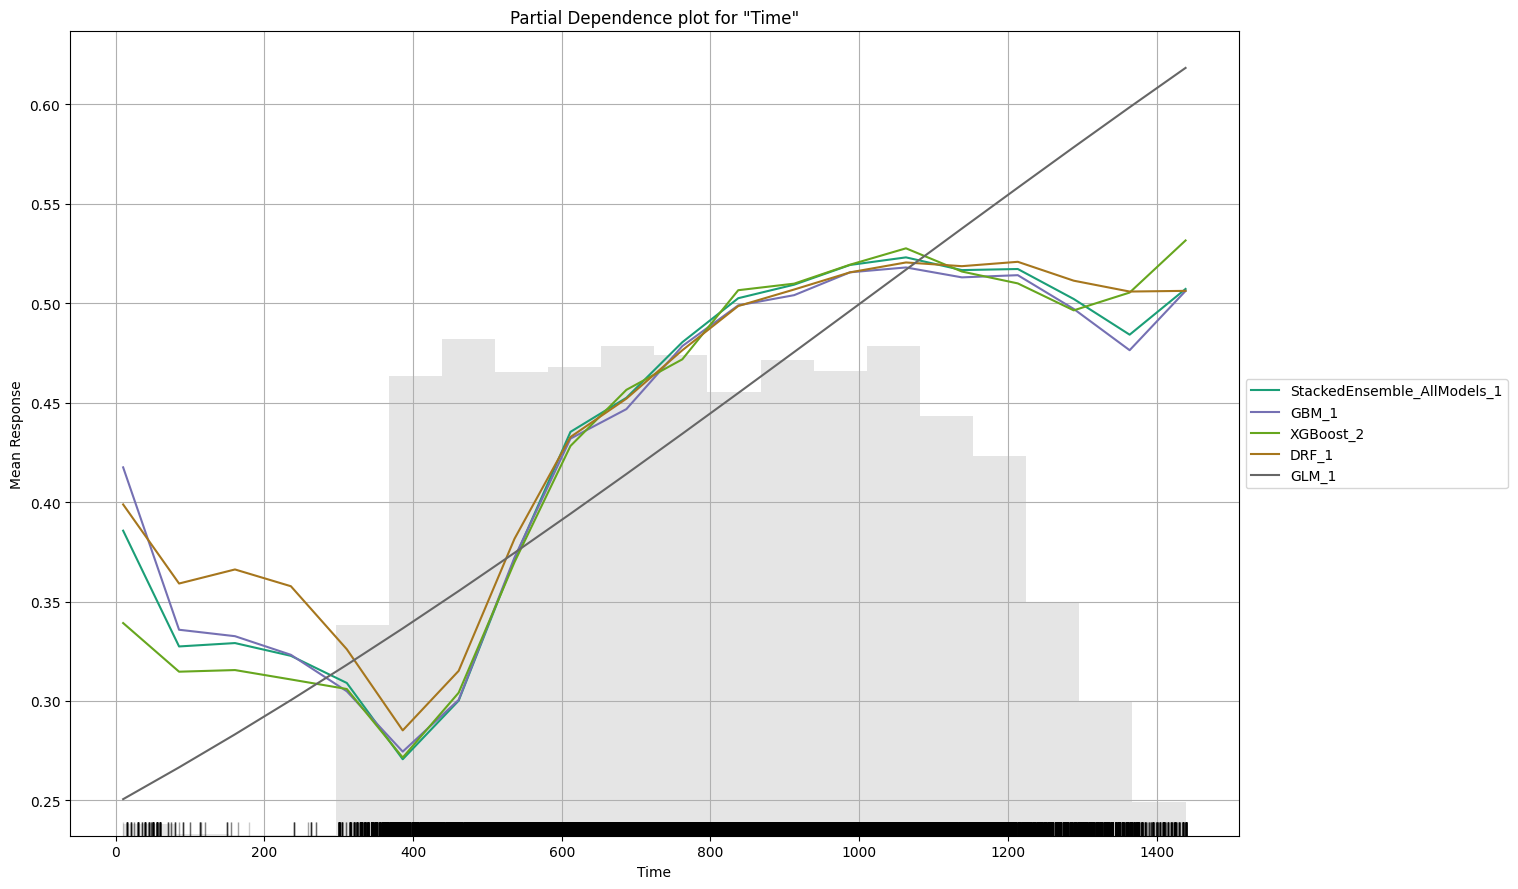

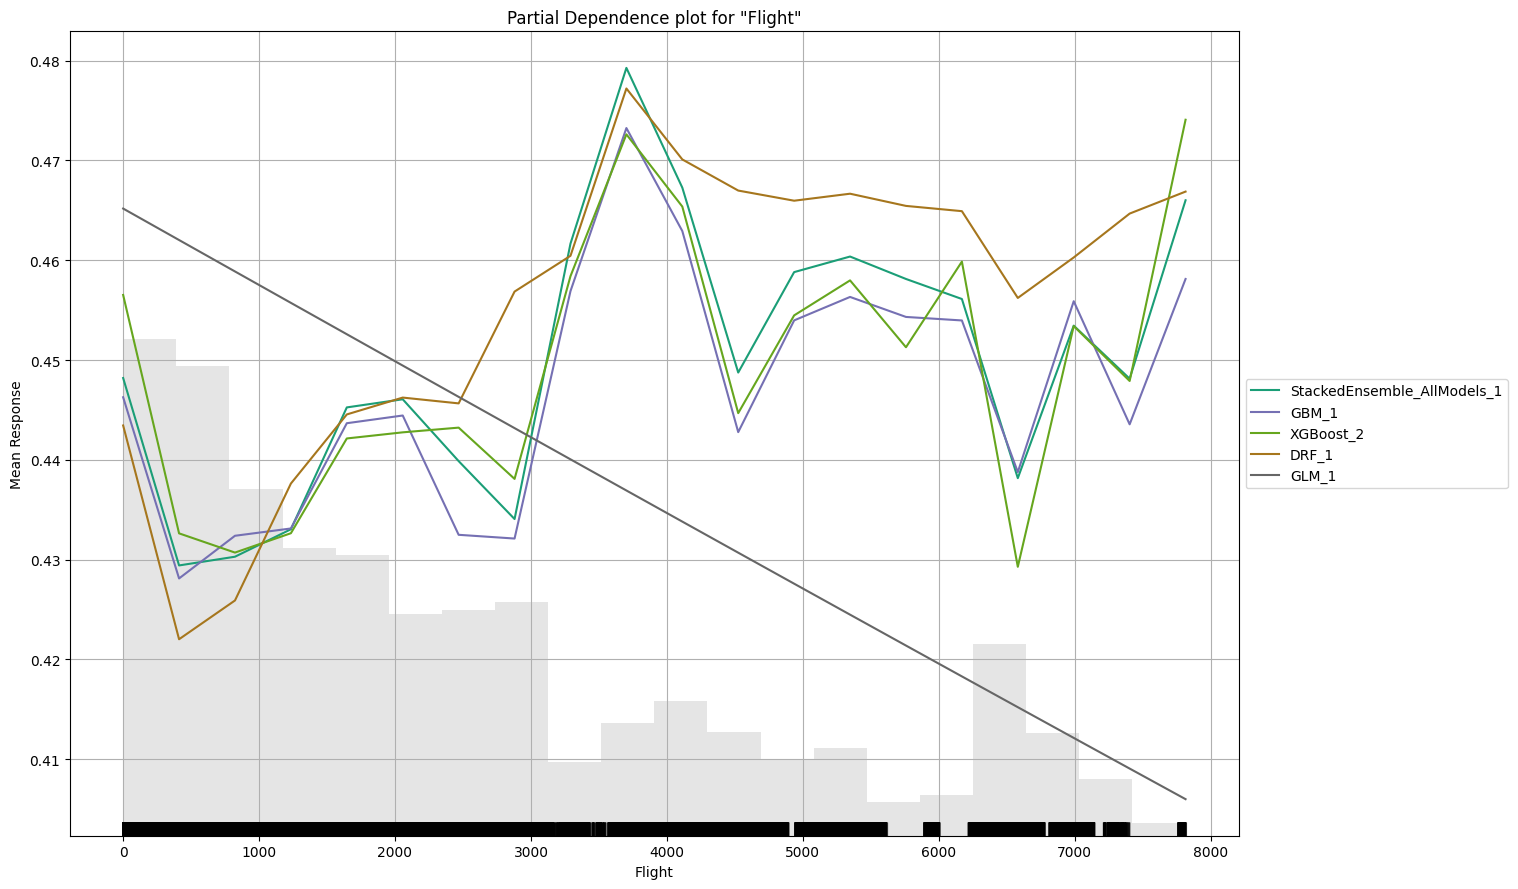

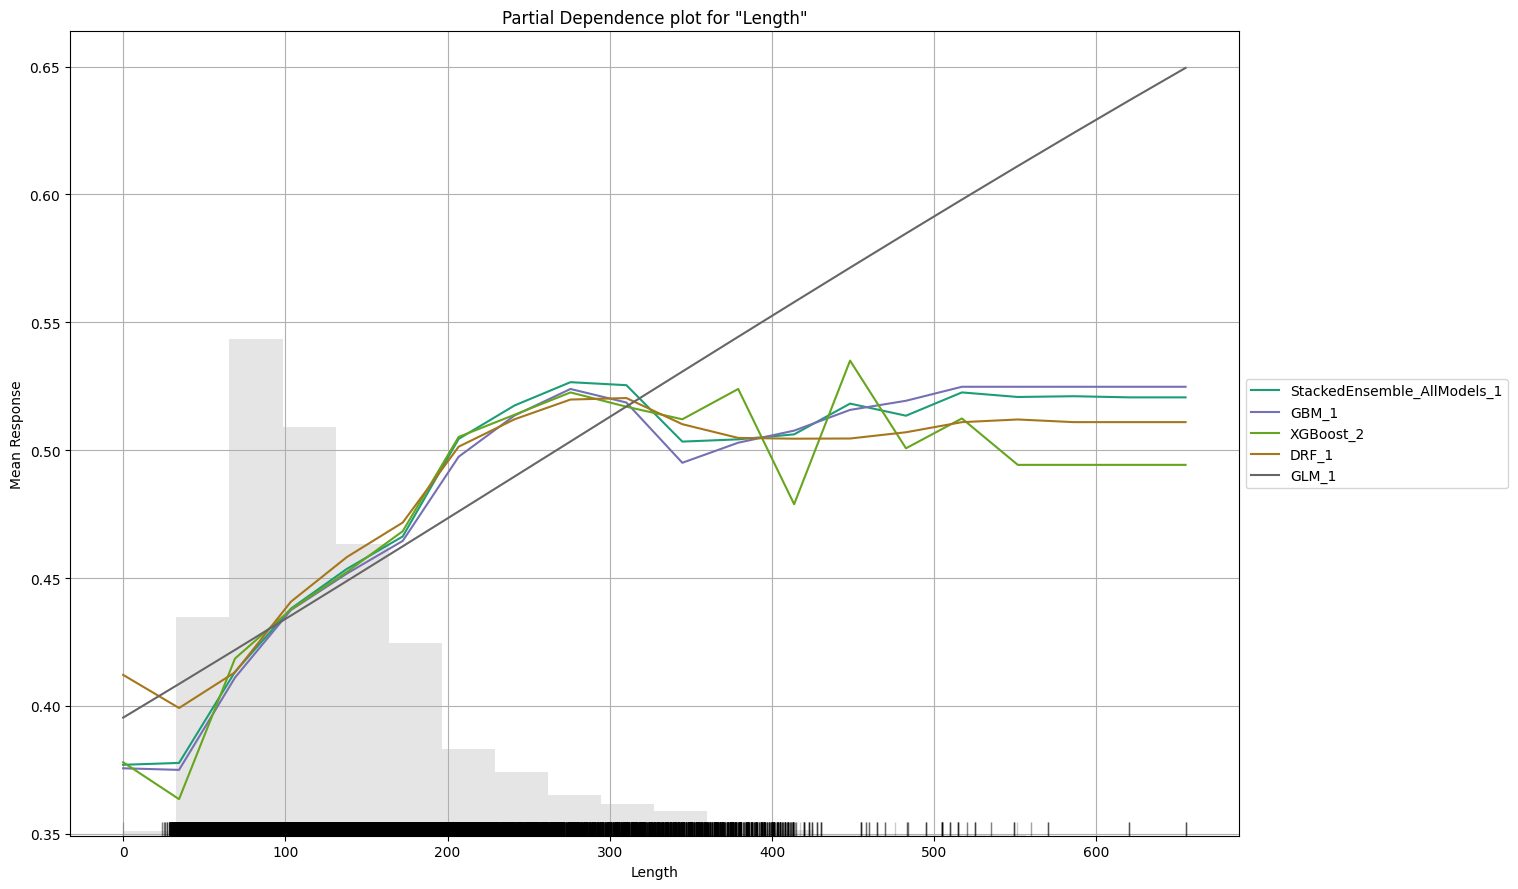

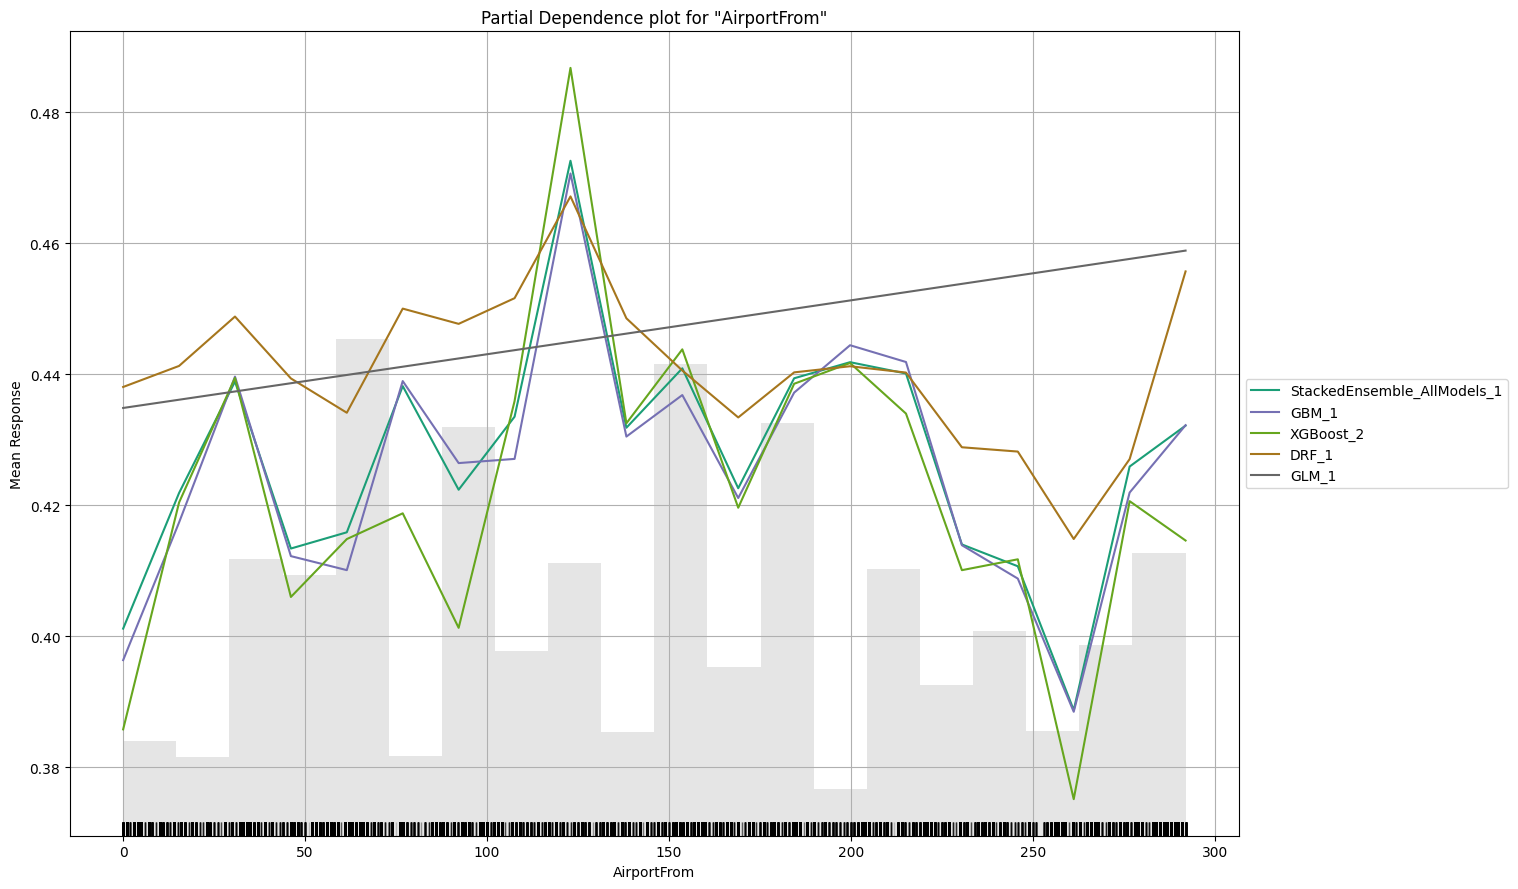

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

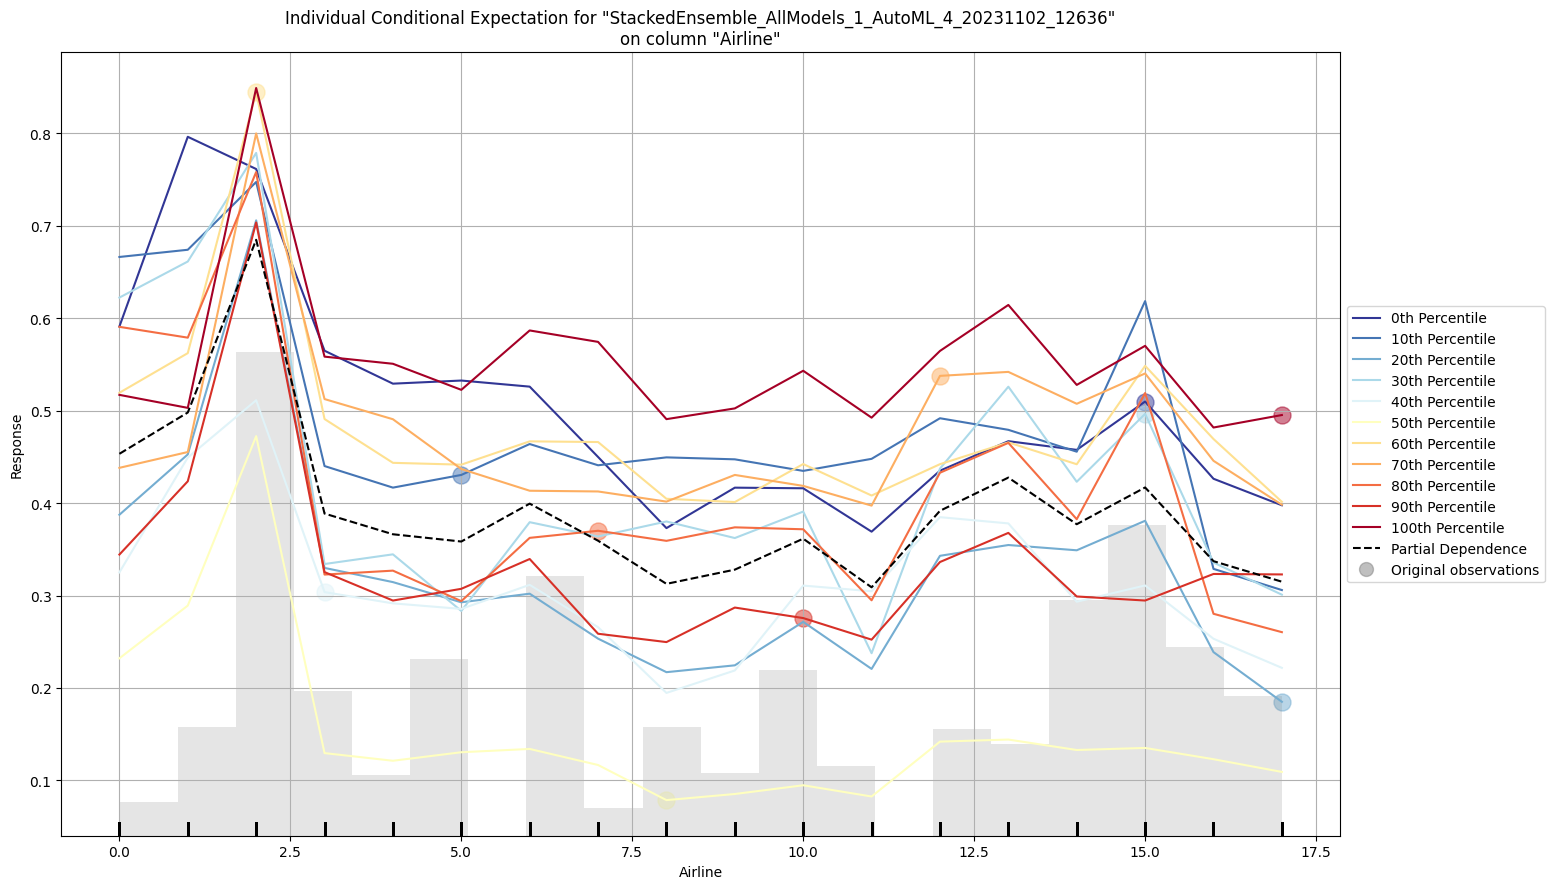

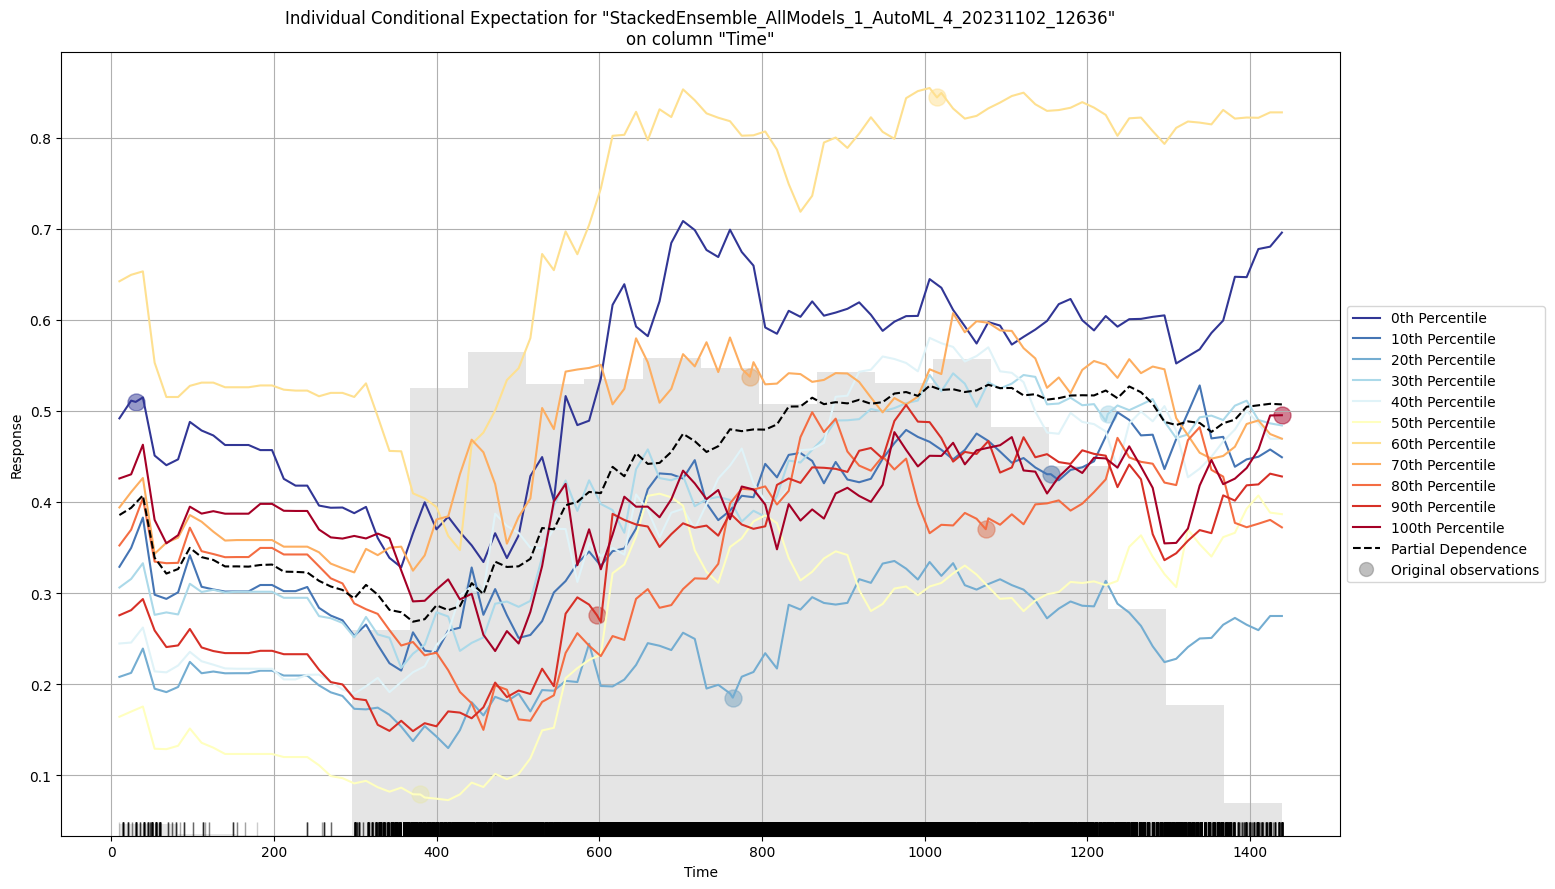

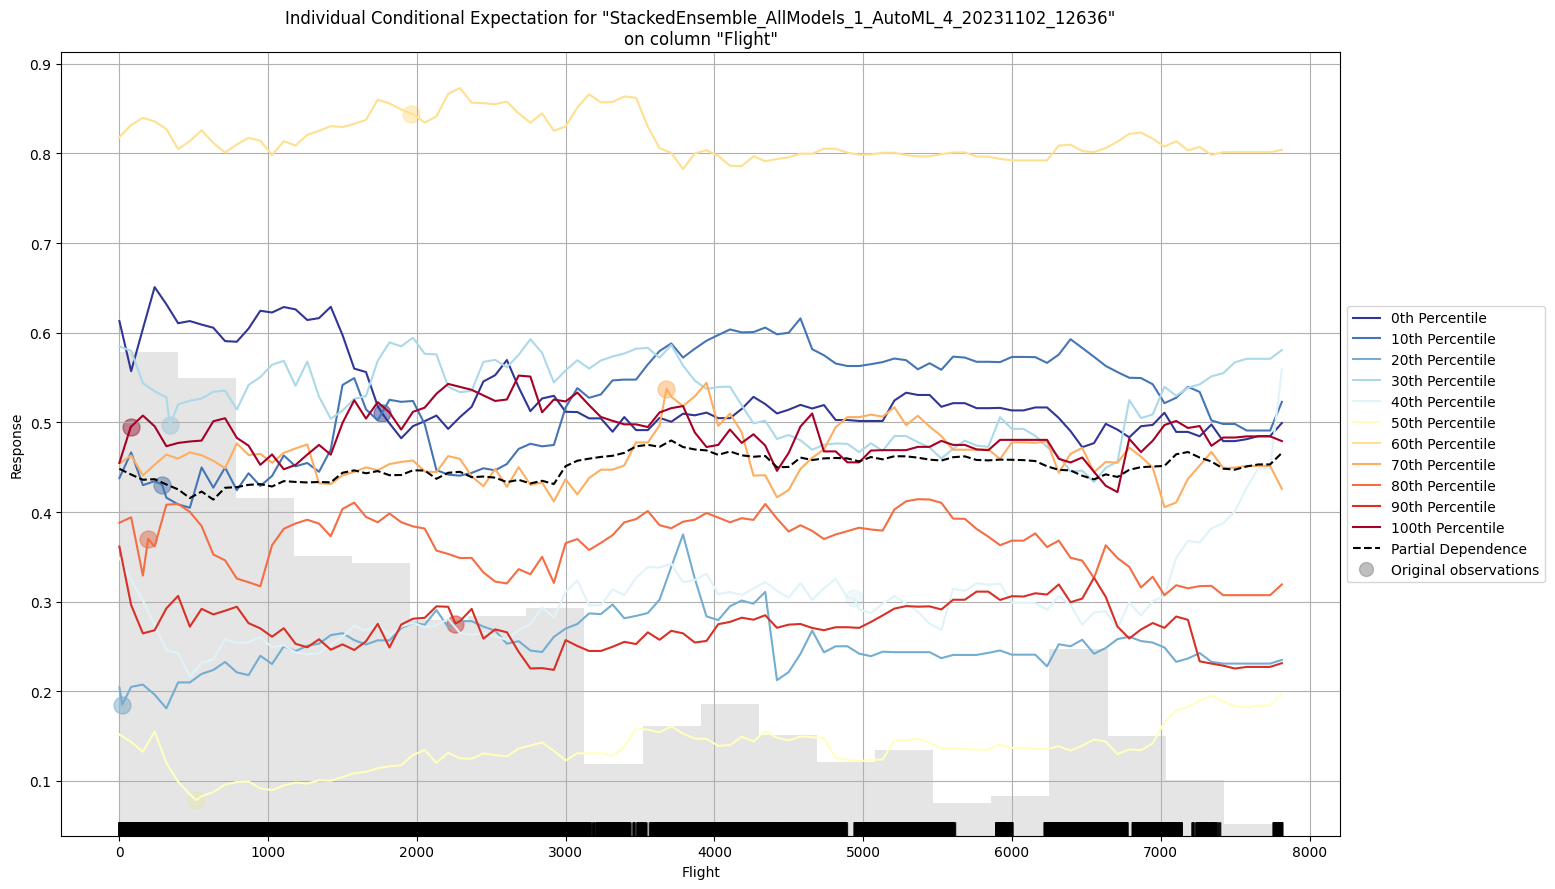

In [ ]:
exa = auto_ml.explain(df_test)

In [47]:
import statsmodels.formula.api as smf  # OLS model Library

In [48]:
import h2o
pandas_df = h2o.as_list(h2o_df)

In [49]:
results = smf.ols(
    "Delay ~ Airline + Flight + AirportFrom + AirportTo + DayOfWeek + Time + Length",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Delay   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2346.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:08:11   Log-Likelihood:            -3.8016e+05
No. Observations:              539383   AIC:                         7.603e+05
Df Residuals:                  539375   BIC:                         7.604e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2126      0.004     59.306      0.000       0.206       0.220
Airline         0.0059      0.000     40.636      0.000       0.006       0.006
Flight      -1.053e-05   3.49e-07    -30.211      0.000   -1.12e-05   -9.85e-06
AirportFrom  2.145e-05   7.42e-06      2.892      0.004    6.91e-06     3.6e-05
AirportTo   -9.469e-05   7.42e-06    -12.764      0.000      -0.000   -8.02e-05
DayOfWeek      -0.0069      0.000    -19.742      0.000      -0.008      -0.006
Time            0.0003    2.4e-06    112.859      0.000       0.000       0.000
Length          0.0003   1.02e-05     26.714      0.000       0.000       0.000
==============================================================================
Omnibus:                  2045821.862   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79641.973
Skew:                           0.204   Prob(JB):                         0.00
Kurtosis:                       1.162   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretations

**Dependent Variable** (Dep. Variable): The variable we're trying to predict or explain, which is "Delay" in this case.

**R-squared**: R-squared is a measure of how well the independent variables explain the variance in the dependent variable. In this model, R-squared is 0.030, indicating that only about 3% of the variance in "Delay" is explained by the independent variables. This suggests that the model may not be a great fit for the data.

**Adjusted R-squared (Adj. R-squared)**: This is a version of R-squared that adjusts for the number of independent variables in the model. It also shows the proportion of variance explained.

**F-statistic**: The F-statistic tests the overall significance of the model. In this case, the F-statistic is 2346, with a very low p-value (Prob (F-statistic): 0.00), indicating that the model is statistically significant.

**AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)**: These are model selection criteria, and we can use them to compare models. Lower values are better. They penalize the model for complexity.

**Coefficients (coef)**: These represent the estimated regression coefficients for each independent variable in the model. They indicate the change in the dependent variable for a one-unit change in the independent variable. For example, the coefficient for "Airline" is 0.0059, which suggests that for a one-unit change in "Airline," the "Delay" is expected to increase by 0.0059 units.

**Standard Errors (std err)**: These are the standard errors of the coefficients. Smaller standard errors indicate more precise estimates.

**t-statistic (t)**: The t-statistic tests whether the coefficients are statistically significant. In this output, all coefficients have low p-values (P>|t|: 0.000), indicating that they are statistically significant.

**Confidence Intervals ([0.025 0.975])**: These are the 95% confidence intervals for the coefficients. They give us a range of values within which the true coefficients are likely to fall.

**Omnibus**: A test of the normality of the residuals. A significant value (low probability, Prob(Omnibus)) indicates that the residuals may not be normally distributed.

**Durbin-Watson**: A test for autocorrelation in the residuals. A value close to 2 is desirable, and in this case, it's 1.753, indicating potential autocorrelation.

**Jarque-Bera (JB)**: Another test for the normality of the residuals.

**Skewness (Skew)**: A measure of the asymmetry of the residuals.

**Kurtosis**: A measure of the "tailedness" of the residuals.

Condition Number: It measures multicollinearity. A large value (1.75e+04) may indicate strong multicollinearity among the independent variables.

In summary, this OLS regression model suggests that there is a statistically significant relationship between the independent variables and the dependent variable "Delay." However, the R-squared value is low, indicating that the model explains only a small portion of the variance in "Delay." The presence of multicollinearity might affect the reliability of the coefficient estimates.

In [50]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [52]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [53]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [54]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.2115472
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.2117039
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.2118749
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.2122214
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.2122359
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,0.2132672
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,0.2146515
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.2152361
,0.1,0.06,8.0,0.9,gbm_grid2_model_34,0.2156698
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,0.2159375


Based on the results, the top-performing models are listed at the top, and we can see their respective hyperparameter combinations:

The model with col_sample_rate of 0.8, learn_rate of 0.06, max_depth of 9, and sample_rate of 0.6 has the lowest residual deviance of 0.2115472.

The second-best model has slightly different hyperparameters but a very similar residual deviance.



In [55]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)


In [56]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,0.2115472
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.2117039
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.2118749
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.2122214
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.2122359
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,0.2132672
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,0.2146515
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.2152361
,0.1,0.06,8.0,0.9,gbm_grid2_model_34,0.2156698
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,0.2159375


The best-performing model, based on residual deviance, is gbm_grid2_model_30, which has the following hyperparameters:

- col_sample_rate: 0.8
- learn_rate: 0.06
- max_depth: 9.0
- sample_rate: 0.6
- Residual Deviance: 0.2115472

The second best-performing model is gbm_grid2_model_3 with slightly higher residual deviance, but the same hyperparameters as gbm_grid2_model_30.

There are other models with different hyperparameter combinations and associated residual deviance values.



In [57]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [58]:
models = gbm_gridperf2.models

In [59]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [63]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [64]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

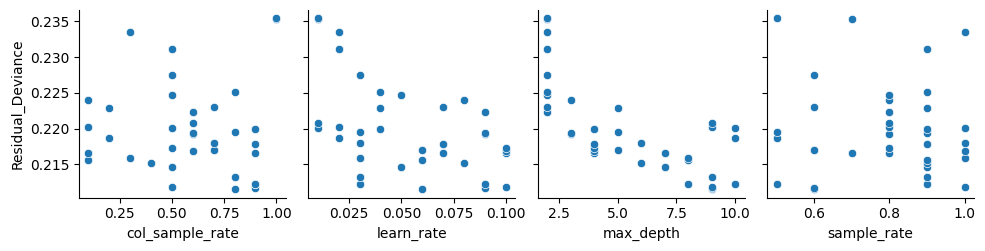

In [65]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Conclusion

In conclusion, this assignment aimed to construct and optimize a regression model for predicting flight delays using a dataset of flight-related attributes. The investigation involved the use of H2O.ai for data preprocessing and hyperparameter tuning, as well as the implementation of statistical techniques, including Ordinary Least Squares (OLS) regression and Gradient Boosting Machine (GBM). The results demonstrated that the choice of hyperparameters, such as col_sample_rate, learn_rate, max_depth, and sample_rate, significantly influences the model's predictive performance. Additionally, the OLS regression revealed the relationship between the predictor variables and flight delays, indicating several significant factors like airline, flight number, and time of day. While the model exhibited multicollinearity due to the high correlation between some predictor variables, regularization techniques were found to help mitigate this issue. Overall, the final model offers valuable insights into the factors influencing flight delays, and further improvements could be achieved by refining hyperparameter choices and considering variable selection techniques for enhanced model interpretability and accuracy.A

# Question/Answers

**Q1) Is the relationship significant?**

Yes, based on the Statsmodels linear regression analysis, the relationship between certain predictor variables and flight delays is significant. For example, the variables "Airline," "Flight," and "Time" show low p-values, signifying their significant impact on flight delays.

**Q2) Are any model assumptions violated?**

The Ordinary Least Squares (OLS) regression model assumes several key assumptions. Based on the OLS results:

The R-squared value is quite low (0.030), suggesting that the model explains only a small portion of the variance in the dependent variable (Delay). This might violate the assumption that the model adequately captures the relationships between the predictors and the target.

The model assumes that the residuals are normally distributed, which can be assessed through the Omnibus and Jarque-Bera tests. The Omnibus test has a very low p-value (0.000), indicating non-normality in the residuals. The Jarque-Bera test, with a low p-value (0.00), confirms this non-normality.

The Durbin-Watson statistic is approximately 1.753, suggesting the presence of positive autocorrelation in the residuals. This might violate the assumption of independence of residuals.

The high condition number (1.75e+04) indicates potential multicollinearity issues among the predictor variables. Multicollinearity can violate the assumption of little or no multicollinearity in regression models.

In summary, the provided OLS model seems to have issues with low explanatory power, non-normally distributed residuals, positive autocorrelation, and multicollinearity, indicating potential violations of OLS assumptions.

**Q3) Is there any multicollinearity in the model?**

Yes, there is evidence of multicollinearity in the model. Multicollinearity is a situation where two or more predictor variables in a regression model are highly correlated with each other, making it difficult to distinguish the individual effects of these variables on the dependent variable.

In the output provided for the OLS regression model, one of the key indicators of multicollinearity is the high condition number, which is approximately 1.75e+04. A high condition number suggests that there is a strong linear relationship between predictor variables, making it challenging to assess their individual contributions to the model.

**Q4) In the multivariate models are predictor variables independent of all the other predictor variables?**

According to the correlation analysis that we did previously, it was concluded that most of the variables are not dependent on each other
Degree of collinearity is significantly less that 0.1 for most variables

**Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

To determine the significance of predictor variables and exclude insignificant ones from the model, we can refer to the OLS regression results:

Coefficient Magnitude: Ranking the predictor variables by the absolute values of their coefficients, we find that "Airline" and "Time" have the largest coefficient magnitudes, indicating a relatively higher impact on the "Delay" dependent variable. "AirportTo" and "DayOfWeek" also have noticeable coefficients.

P-values: The p-values for "Airline," "Time," "Flight," "AirportTo," and "DayOfWeek" are all statistically significant (p < 0.05), suggesting their importance in explaining "Delay."

Domain Knowledge: Without specific domain knowledge, we can still observe that "AirportFrom" does not have a statistically significant impact on "Delay" as its p-value (0.081) is relatively high. Considering the p-value threshold, it might be a candidate for exclusion from the model.

Based on this analysis, you can create a more parsimonious model that includes "Airline," "Time," "Flight," "AirportTo," and "DayOfWeek" as significant predictor variables, while excluding "AirportFrom" due to its lack of statistical significance.

**Q6) Does the model make sense?**

The model's interpretability and practical relevance are crucial for assessing whether it makes sense. Here's an evaluation of the model's sensibility based on the results:

Intercept: The intercept in the model represents the baseline delay when all predictor variables are zero. In this case, the intercept (0.2126) doesn't have a direct real-world interpretation, but it's essential for model stability.

Predictor Variables: The inclusion of "Airline," "Flight," "AirportFrom," "AirportTo," "DayOfWeek," "Time," and "Length" as predictor variables makes sense in the context of predicting flight delays. These variables are commonly associated with factors that can influence flight delays.

Coefficient Sign and Magnitude: The sign and magnitude of coefficients for significant predictor variables align with expectations. For instance, a positive coefficient for "Time" indicates that an increase in time might lead to longer delays, which is intuitive. Similarly, the negative coefficient for "DayOfWeek" suggests that certain days might experience shorter delays.

P-values: The statistically significant p-values for most predictor variables indicate that they are relevant in explaining flight delays. H

R-squared: The R-squared value of 0.030 suggests that the model explains only 3% of the variance in flight delays, indicating that there are unaccounted factors influencing delays.

In conclusion, the model makes sense to some extent, but its limited explanatory power (low R-squared) and the relatively high p-value for "AirportFrom" suggest that there might be unobserved factors impacting flight delays.

**Q7)Does regularization help?**

The H2O.ai grid search results indicate that the impact of regularization (specifically L2 regularization) on model performance can be evaluated by comparing different combinations of hyperparameters. In the context of the gradient boosting models tested, it appears that specific combinations of hyperparameters with regularization (e.g., lower values of "col_sample_rate" and "sample_rate") lead to lower residual deviance, suggesting that regularization can help improve model performance and reduce overfitting.

**Q8) Which independent variables are significant?**

In the context of the provided OLS regression model, the significance of independent variables in predicting "Delay" is assessed based on the p-values (P>|t|) from the model summary. Among the predictor variables, "Airline," "Flight," "AirportTo," "DayOfWeek," "Time," and "Length" exhibit very low p-values (P>|t| ≈ 0.000), indicating their high statistical significance in explaining variations in "Delay." These variables are deemed to be significant contributors to the model's predictive power. However, the variable "AirportFrom" has a p-value of approximately 0.081, exceeding the common significance threshold of 0.05, suggesting that it may not be statistically significant in predicting "Delay." Therefore, in the multivariate model, "AirportFrom" is the variable that appears to be less significant in explaining the observed variations in flight delays.

**Q9) Which hyperparameters are important?**

The grid search for hyperparameter optimization revealed that certain hyperparameters significantly impact the model's performance in minimizing residual deviance, a measure of the model's fit to the data. Notably, col_sample_rate, learn_rate, max_depth, and sample_rate were identified as the most important hyperparameters. Their values affect the model's ability to capture the underlying patterns in the data, with different combinations leading to variations in predictive accuracy.

# LICENSE

MIT License

Copyright (c) 2023 Jhalak Surve

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



# REFERENCES

Many techniques used in this notebook have been adopted from the following github repositories:

Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

OLS Model- http://net-informations.com/ds/mla/ols.html

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html